# PA005: High Value Customer Indentification ( Insiders )

## Planejamento da Solução ( IOT )

### Input - Entrada

1. ***Problema de Negócio***
  - Selecionar os clientes mais valiosos para integrar um programa de Fidelização
   
2. ***Conjunto de Dados***
  - Vendas de um e-commerce online, durane o período de um ano.


### Output - Saída

1. A indicação das pessoas que farão parte do programa de Insiders


  - Lista: 
  
              client_id | is_insider  |
                104224  |   yes/1   
                332131  |   no/0


2. Relatório com as respostas das perguntas de negócio

- Quem são as pessoas elegíveis para participar do programa de Insiders ?
- Quantos clientes farão parte do grupo?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
- Qual a expectativa de faturamento desse grupo para os próximos meses ?
- Quais as condições para uma pessoa ser elegível ao Insiders ?
- Quais as condições para uma pessoa ser removida do Insiders ?
- Qual a garantia que o programa Insiders é melhor que o restante da base ?
- Quais ações o time de marketing pode realizar para aumentar o faturamento?


### Tasks - Tarefas

##### ***1. Quem são as pessoas elegíveis para participar do programa de Insiders ?***
- ***O que é ser elegível? O que são clientes de maior "valor"?***

- ***Faturamento:***

        - Alto Ticket Médio.
        - Alto LTV (Live Time Value).
        - Baixa Recência.
        - Alto Basket Size.
        - Baixa Probabilidade de Churn.
        - Previsão de LTV.
        - Alta propensão de compra.
- ***Custo:***

        - Baixo custo de devolução

- ***Experiência de compra:***

        - Média alta das avaliações
        

    
##### ***2. Quantos clientes farão parte do grupo?***


        - Número total de clientes
        - % do grupo de Insiders

##### ***3. Quais as principais características desses clientes ?***
- ***Escrever características do cliente:***

        - Idade
        - Localização
- ***Escrever características do consumo:***

        - Atributos de clusterização
        

##### ***4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?***

- ***Faturamento total do ano***

- ***Faturamento do grupo Insiders***


##### 5. ***Qual a expectativa de faturamento desse grupo para os próximos meses ?***

- ***LTV do grupo Insiders***

- ***Análise de Cohort*** 

##### 6. ***Quais as condições para uma pessoa ser elegível ao Insiders ?***

- ***Definir periodicidade ( 1 mês, 3 meses )***

- ***A pessoa precisa ser similar ou parecido com uma pessoa do grupo***

##### 7. ***Quais as condições para uma pessoa ser removida do Insiders ?***

- ***Definir periodicidade ( 1 mês, 3 meses )***

- ***A pessoa precisa ser dissimilar ou não parecida com uma pessoa do grupo***

##### 8. ***Qual a garantia que o programa Insiders é melhor que o restante da base ?***

- ***Teste A/B***

- ***Teste de Hipóteses***

##### 9. ***Quais ações o time de marketing pode realizar para aumentar o faturamento?***

- ***Desconto***
- ***Preferência de Compra***
- ***Frente***
- ***Visita***


## 0.0. Imports

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm

from matplotlib import pyplot as plt
from IPython.display import HTML
from sklearn import cluster as c
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import metrics as m
from sklearn import decomposition as dd
from sklearn import preprocessing as pp
from sklearn import manifold as mn 
from sklearn import ensemble as en
from sklearn import mixture as mx
from sklearn.neighbors import NearestNeighbors 

from scipy.cluster import hierarchy as hc
from scipy.cluster.hierarchy import linkage

from plotly import express as px
from pandas_profiling import ProfileReport

import umap.umap_ as umap

### 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use( 'ggplot' )
    plt.rcParams[ 'figure.figsize' ] = [24, 9]
    plt.rcParams[ 'font.size' ] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()

jupyter_settings() 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 0.2. Load Dataset

In [3]:
# load data
df_raw = pd.read_csv('/Users/thiago/Thiago/Data_Science/comunidade_ds/insiders_clustering/data/raw/ecommerce.csv', encoding='unicode_escape' )

# drop extra column
df_raw = df_raw.drop( columns=['Unnamed: 8'], axis=1 )

In [4]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## <font color='red'> 1.0. Descrição dos Dados </font>

In [5]:
df1 = df_raw.copy()

### 1.1. Rename Columns

In [6]:
cols_new = [ 'invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country' ]
df1.columns = cols_new

### 1.2. Data Dimensions

In [7]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of cols: {}'.format( df1.shape[1] ) )

Number of rows: 541909
Number of cols: 8


### 1.3. Data Types

In [8]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

### 1.4. Check NA

In [9]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

### 1.5. Replace NA

In [10]:
df_missing = df1.loc[df1['customer_id'].isna(), :]
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]

In [11]:
# create reference
df_backup = pd.DataFrame( df_missing['invoice_no'].drop_duplicates() )
df_backup['customer_id'] = np.arange( 19000, 19000+len( df_backup ), 1)

# merge original with reference dataframe
df1 = pd.merge( df1, df_backup, on='invoice_no', how='left' )

# coalesce
df1['customer_id'] = df1['customer_id_x'].combine_first( df1['customer_id_y'] )

# drop extra columns
df1 = df1.drop( columns=['customer_id_x', 'customer_id_y'], axis=1 )

df1.head()


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,United Kingdom,17850.0


In [12]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

### 1.6. Change Types

In [13]:
# invoice_date
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format='%d-%b-%y' )

# customer_id
df1['customer_id'] = df1['customer_id'].astype(int)

In [14]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

### 1.7. Descriptive Statistics

In [15]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

#### 1.7.1. Numerical Attributes

In [16]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - desvio padrão, mínimo, máximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'mediana', 'std', 'skew', 'kurtosis']
m


,attributes,min,max,range,mean,mediana,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


#### <font color='red'> 1.7.1.1. Numerical Attributes - Investigating </font>

1. Quantidade negativa ( pode ser devolução?? )
2. Preço unitário igual a zero ( pode ser promoção?? )

#### 1.7.2. Categorical Attributes

In [17]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


<b>Invoice No</b>

In [18]:
# problema: Temos o invoice com letras e numeros
#df1['invoice_no'].astype( int )

# Identificação
df_letter_invoices = df1.loc[df1['invoice_no'].apply( lambda x: bool ( re.search( '[^0-9]+', x ) ) ), :]
df_letter_invoices.head()

print( 'Total number os invoices: {}'.format( len ( df_letter_invoices ) ) ) 
print( 'Total number os negative quantity: {}'.format( len( df_letter_invoices[df_letter_invoices['quantity'] < 0 ] ) ) )

Total number os invoices: 9291
Total number os negative quantity: 9288


In [19]:
#cat_attributes['invoice_no'].astype( int )
len( cat_attributes.loc[ cat_attributes['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), 'invoice_no'].drop_duplicates() )
#cat_attributes.loc[173995, : ]

3839

<b>Stock Code</b>

In [20]:
# stock code
#at_least_one_string = cat_attributes.loc[ cat_attributes['stock_code'].apply( lambda x: bool ( re.search( '[^0-9+]', x ) ) ), 'stock_code'].head()

#print( at_least_one_string )

#
#cat_attributes.loc[cat_attributes['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique() 
df1.loc[cat_attributes['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), :].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
45,536370,POST,POSTAGE,3,2016-11-29,18.00,France,12583
141,C536379,D,Discount,-1,2016-11-29,27.50,United Kingdom,14527
386,536403,POST,POSTAGE,1,2016-11-29,15.00,Netherlands,12791
1123,536527,POST,POSTAGE,1,2016-11-29,18.00,Germany,12662
1814,536544,DOT,DOTCOM POSTAGE,1,2016-11-29,569.77,United Kingdom,19001


In [21]:
# check stock codes only characters
df1.loc[df1['stock_code'].apply( lambda x: bool ( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique()

# Ação:
## 1. Remove stock_code in ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

<b>Description</b>

In [22]:
df1.head()

# Ação: deletar description

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


<b>Country</b>

In [23]:
len( df1['country'].unique() )

38

In [24]:
df1['country'].value_counts( normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

In [25]:
df1[['customer_id', 'country']].drop_duplicates().groupby( 'country' ).count().reset_index().sort_values( 'customer_id', ascending=False )

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,15
16,Hong Kong,15


## <font color='red'> 2.0. Filtragem das Variáveis </font>

In [26]:
df2 = df1.copy()

In [27]:
# ===== Numerical Attributes ======
# unit price > 0.04
df2 = df2.loc[df2['unit_price'] > 0.04, :]

# ===== Categorical Attributes ======
# stock code != [ POST, D, M, DOT, CRUK ]
df2 = df2[~df2['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK']) ] 

# description
df2 = df2.drop( columns='description', axis=1 )

# map
df2 = df2[~df2['country'].isin( ['European Community', 'Unspecified'] ) ]

# bad users
df2 = df2[~df2['customer_id'].isin( [16446] ) ] 

## quantity - Negative numbers means product returns
df2_returns = df2.loc[df2['quantity'] < 0, :]
df2_purchase = df2.loc[df2['quantity'] >= 0, :]

## <font color='red'> 3.0. Feature Engineering </font>

### Feature Ideas
### Moving Average - 7d - 14d - 28d    
### Quantidade de Compras por mês, antes do dia 15 e depois do dia 15
### Average Financial 
### Basket Size * Price - Quantidade de precos por cesta
###### 

In [28]:
df3 = df2.copy()

### 3.1. Feature Creation

In [29]:
# data reference
df_ref = df3.drop( ['invoice_no', 'stock_code','quantity', 'invoice_date', 'unit_price', 'country' ], axis=1 ).drop_duplicates( ignore_index=True)

#### 3.1.1. Gross Revenue

In [30]:
# Gross Revenue ( Faturamento ) quantity * price
df2_purchase.loc[:, 'gross_revenue'] = df2_purchase.loc[:, 'quantity'] * df2_purchase.loc[:, 'unit_price']

# Monetary
df_monetary = df2_purchase.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, how='left', on='customer_id' )
df_ref.isna().sum()

/var/folders/w5/0w2xv4r95g1gfgbzpp2dm6gr0000gn/T/ipykernel_60417/225208262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_purchase.loc[:, 'gross_revenue'] = df2_purchase.loc[:, 'quantity'] * df2_purchase.loc[:, 'unit_price']


customer_id       0
gross_revenue    91
dtype: int64

#### 3.1.2. Recency - Day from last Purchase

In [31]:
# Recency - It depends on product returns
df_recency = df2_purchase.loc[:, ['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2_purchase['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, how='left', on='customer_id' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

#### 3.1.3. Quantity of Purchased 

In [32]:
# Número de Produtos - It depends os product returns
df_frequency = (df2_purchase.loc[:, ['customer_id', 'invoice_no']].drop_duplicates()
                                                                  .groupby( 'customer_id' )
                                                                  .count()
                                                                  .reset_index()
                                                                  .rename( columns={'invoice_no':'qtde_invoices'}))

df_ref = pd.merge( df_ref, df_frequency, how='left', on='customer_id' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
dtype: int64

#### 3.1.4. Quantity of Items Purchased 

In [33]:
# Número de Produtos - It depends os product returns
df_frequency = (df2_purchase.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id' )
                                                                .sum()
                                                                .reset_index()
                                                                .rename( columns={'quantity':'qtde_items'} ))
df_ref = pd.merge( df_ref, df_frequency, how='left', on='customer_id' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
dtype: int64

#### 3.1.5. Quantity of Products Purchased

In [34]:
# Número de Produtos - It depends os product returns
df_frequency = (df2_purchase.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id' )
                                                                .count()
                                                                .reset_index()
                                                                .rename( columns={'stock_code':'qtde_products'} ))
df_ref = pd.merge( df_ref, df_frequency, how='left', on='customer_id' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
dtype: int64

#### 3.1.6. Average Ticket Value

In [35]:
# Average Ticket
df_avg_ticket = df2_purchase.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue' : 'avg_ticket' } ) 
#df_avg_ticket['avg_ticket'] = np.round( df_avg_ticket['avg_ticket'], 2 )
df_ref = pd.merge( df_ref, df_avg_ticket, how='left', on='customer_id' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
avg_ticket       91
dtype: int64

#### 3.1.7. Average Recency Days

In [36]:
# Average Recency Days
df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=[ True, True] )
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift() #next invoice date

df_aux['avg_recency_days'] = df_aux.apply( lambda x: ( x['invoice_date'] - x['previous_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )

df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'previous_date'], axis=1 ).dropna()

# Average Recency
df_avg_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index()

# Merge
df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
dtype: int64

#### 3.1.8. Frequency Purchase

In [37]:
df_aux = ( df2_purchase[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                    .groupby( 'customer_id' )
                                                    .agg( max_ = ( 'invoice_date', 'max' ),
                                                          min_ = ( 'invoice_date', 'min' ),
                                                         days_ = ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                          buy_ = ( 'invoice_no', 'count' ) ) ).reset_index()

# Frequency
df_aux['frequency'] = df_aux[[ 'buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if x['days_'] != 0 else 0, axis=1)

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )

In [38]:
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
dtype: int64

#### 3.1.9. Number os Returns

In [39]:
# Number of Returns
df_returns = df2_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'qtde_returns'} )
df_returns['qtde_returns'] = df_returns['qtde_returns'] * -1

df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0

df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
dtype: int64

#### 3.1.10. Basket Size - Quantidade de Itens por Cesta ( Quantity )

In [40]:
df_aux = ( df2_purchase.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby( 'customer_id' )
                                                                           .agg( n_purchases=('invoice_no', 'nunique'),
                                                                                 n_products=('quantity', 'sum') )
                                                               .reset_index() )  

# Calculation
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchases']

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id' )

df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
avg_basket_size       91
dtype: int64

#### 3.1.11. Unique Basket Size - Quantidade de Produtos Distintos por Compra

In [41]:
df_aux = ( df2_purchase.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby( 'customer_id' )
                                                                           .agg( n_purchases=('invoice_no', 'nunique'),
                                                                                 n_products=('stock_code', 'nunique') )
                                                               .reset_index() )  

# Calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchases']

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id' )

df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtde_invoices               91
qtde_items                  91
qtde_products               91
avg_ticket                  91
avg_recency_days          2816
frequency                   91
qtde_returns                 0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [42]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.500000,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,27.250000,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,23.187500,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,8.600000,0.073171,22.0,26.666667,0.333333


## <font color='red'> 4.0. EDA ( Exploratory Data Analysis )</font>

In [43]:
df4 = df_ref.dropna().copy()

In [44]:
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

### 4.1. Univariate Analysis 

Notes

In [45]:
#profile = ProfileReport( df4 )
#profile.to_file( '/Users/thiago/Thiago/Data_Science/comunidade_ds/insiders_clustering/data/output_v3.html' )

### 4.1.1. Gross Revenue

In [46]:
df4[df4['gross_revenue'] >= 279138]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,7.844444,0.20339,288.0,2733.944444,9.708333


In [47]:
df4.sort_values( 'gross_revenue', ascending=False ).head(10)

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,7.844444,0.203390,288.0,2733.944444,9.708333
492,18102,259657.30,0.0,60.0,64124.0,431.0,602.453132,14.680000,0.163043,0.0,1068.733333,2.500000
433,17450,194550.79,8.0,46.0,69993.0,337.0,577.302047,12.821429,0.127778,952.0,1521.586957,2.695652
66,14911,140438.72,1.0,199.0,79963.0,5670.0,24.768734,2.601399,0.533512,3332.0,401.824121,8.969849
1150,12415,124564.53,24.0,20.0,77373.0,713.0,174.704811,20.866667,0.063694,427.0,3868.650000,22.150000
190,14156,117375.63,9.0,55.0,57785.0,1399.0,83.899664,7.260000,0.151515,859.0,1050.636364,12.963636
15,17511,91062.38,2.0,31.0,64549.0,963.0,94.561142,11.593750,0.083333,1535.0,2082.225806,14.612903
12,16029,72882.09,38.0,62.0,40207.0,241.0,302.415311,9.054054,0.184524,8004.0,648.500000,0.693548
955,16684,66653.56,4.0,28.0,50255.0,277.0,240.626570,22.125000,0.078873,864.0,1794.821429,4.250000
36,13694,65019.62,3.0,50.0,62812.0,567.0,114.673051,9.736842,0.134771,1504.0,1256.240000,7.300000


In [48]:
df3[df3['customer_id'] == 14646 ].head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
37952,539491,21981,12,2016-12-18,0.29,Netherlands,14646
37953,539491,21986,12,2016-12-18,0.29,Netherlands,14646
37954,539491,22720,2,2016-12-18,4.95,Netherlands,14646
37955,539491,21931,1,2016-12-18,1.95,Netherlands,14646
37956,539491,22613,2,2016-12-18,0.85,Netherlands,14646
37957,539491,20751,1,2016-12-18,2.10,Netherlands,14646
37958,539491,21246,2,2016-12-18,4.95,Netherlands,14646
37959,539491,22960,1,2016-12-18,4.25,Netherlands,14646
37960,539491,22355,2,2016-12-18,0.85,Netherlands,14646
37961,539491,21123,2,2016-12-18,1.25,Netherlands,14646


In [49]:
np.sum(df3.loc[df3['customer_id'] == 14646, 'quantity' ] * df3.loc[df3['customer_id'] == 14646, 'unit_price' ] )

278778.02

In [50]:
len( df3.loc[df3['customer_id'] == 14646, 'invoice_no' ].unique() )

73

### 4.1.2. Qtde_products

In [51]:
df4[df4['qtde_products'] == 7837]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
68,17841,40959.72,1.0,124.0,22853.0,7837.0,5.226454,3.321429,0.33244,203.0,184.298387,10.653226


### 4.1.3. Avg_ticket

In [52]:
df4[df4['avg_ticket'] == 56157.5]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size


In [53]:
df3[df3['customer_id'] == 16446]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id


### 4.1.4. Frequency

In [54]:
df4[df4['frequency'] == 17 ]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.5,17.0,40.0,50.970588,0.617647


In [55]:
df3[df3['customer_id'] == 17850].sort_values('quantity', ascending=True).head(30)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
86895,C543611,82494L,-12,2017-02-08,2.55,United Kingdom,17850
86896,C543611,21071,-6,2017-02-08,1.06,United Kingdom,17850
86889,C543611,22632,-6,2017-02-08,1.85,United Kingdom,17850
86902,C543611,21169,-2,2017-02-08,1.45,United Kingdom,17850
86900,C543611,71477,-2,2017-02-08,2.75,United Kingdom,17850
86897,C543611,82483,-2,2017-02-08,4.95,United Kingdom,17850
86892,C543611,82494L,-2,2017-02-08,2.55,United Kingdom,17850
86901,C543611,82483,-1,2017-02-08,4.95,United Kingdom,17850
86888,C543611,82483,-1,2017-02-08,4.95,United Kingdom,17850
86891,C543611,21871,-1,2017-02-08,1.06,United Kingdom,17850


### 4.1.5. Average Basket Size

In [56]:
df4[df4['avg_basket_size'] == 40498.5 ]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size


### 4.2. Bivariate Analysis

In [57]:
cols = ['customer_id']
df42 = df4.drop( cols, axis=1 )

<Figure size 2500x1200 with 0 Axes>

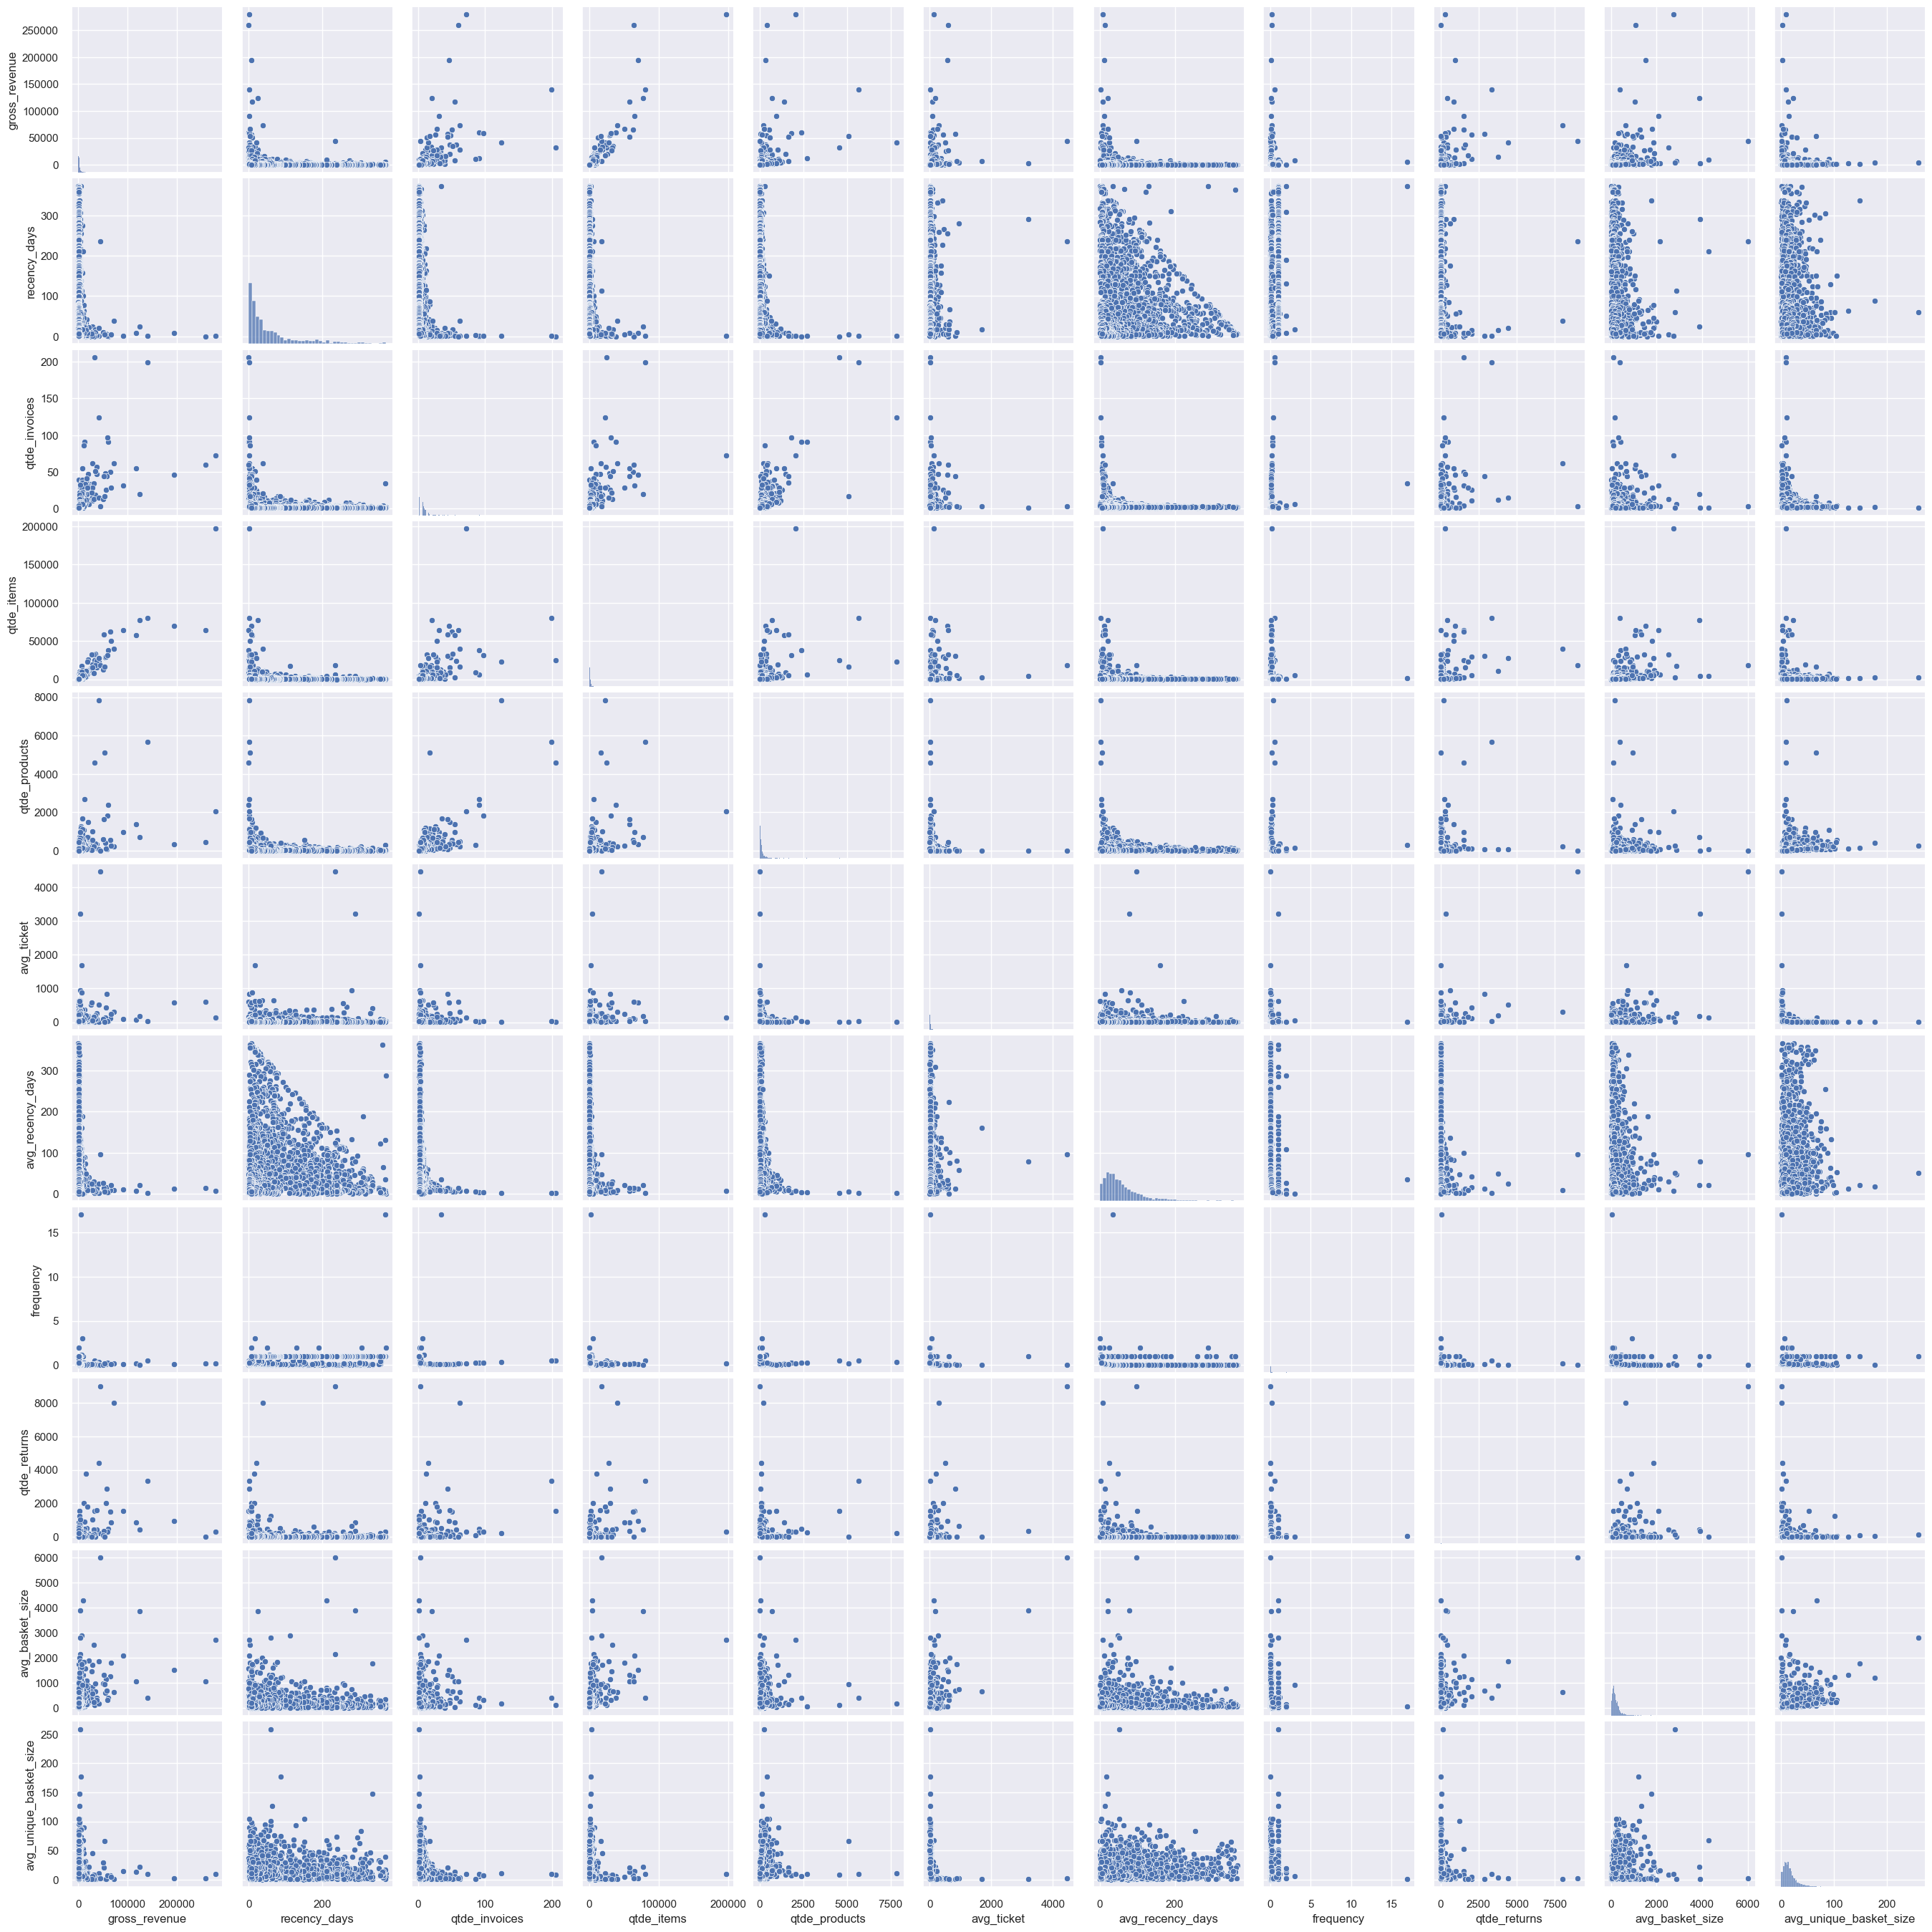

In [58]:
plt.figure( figsize=(25, 12 ) )
sns.pairplot( df42 )

### Notes

1.0 Frequency has low variance

2.0 Avg Ticket has low variance 

3.0 Avaliar o comportamento semelhante dos gráficos, verificando alta correlação e possibilidade de remoção da feature ( invoices/items/products )

### 4.3. Estudo do Espaço

In [115]:
# original dataset
#df43 = df4.drop( columns=['customer_id'], axis=1 ).copy()

# selected dataset
cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'qtde_products', 'frequency', 'qtde_returns']
df43 = df4[ cols_selected ].copy()

In [116]:
mm = pp.MinMaxScaler()

df43['gross_revenue'] = mm.fit_transform( df43[['gross_revenue']] )
df43['recency_days'] = mm.fit_transform( df43[['recency_days']] )
#df43['qtde_invoices'] = mm.fit_transform( df43[['qtde_invoices']] )
#df43['qtde_items'] = mm.fit_transform( df43[['qtde_items']] )
df43['qtde_products'] = mm.fit_transform( df43[['qtde_products']] )
#df43['avg_ticket'] = mm.fit_transform( df43[['avg_ticket']] )
#df43['avg_recency_days'] = mm.fit_transform( df43[['avg_recency_days']] )
df43['frequency'] = mm.fit_transform( df43[['frequency']] )
df43['qtde_returns'] = mm.fit_transform( df43[['qtde_returns']] )
#df43['avg_basket_size'] = mm.fit_transform( df43[['avg_basket_size']] )
#df43['avg_unique_basket_size'] = mm.fit_transform( df43[['avg_unique_basket_size']] )

X = df43.copy()

In [117]:
df43.head()

,customer_id,gross_revenue,recency_days,qtde_products,frequency,qtde_returns
0,17850,0.019292,0.997319,0.037774,1.000000,0.004438
1,13047,0.011559,0.150134,0.021695,0.001345,0.003883
2,12583,0.024000,0.005362,0.029479,0.002052,0.005547
3,13748,0.003375,0.254692,0.003446,0.000734,0.000000
4,15100,0.003116,0.892761,0.000255,0.003985,0.002441


### 4.3.1. PCA

In [118]:
X.shape[1]

6

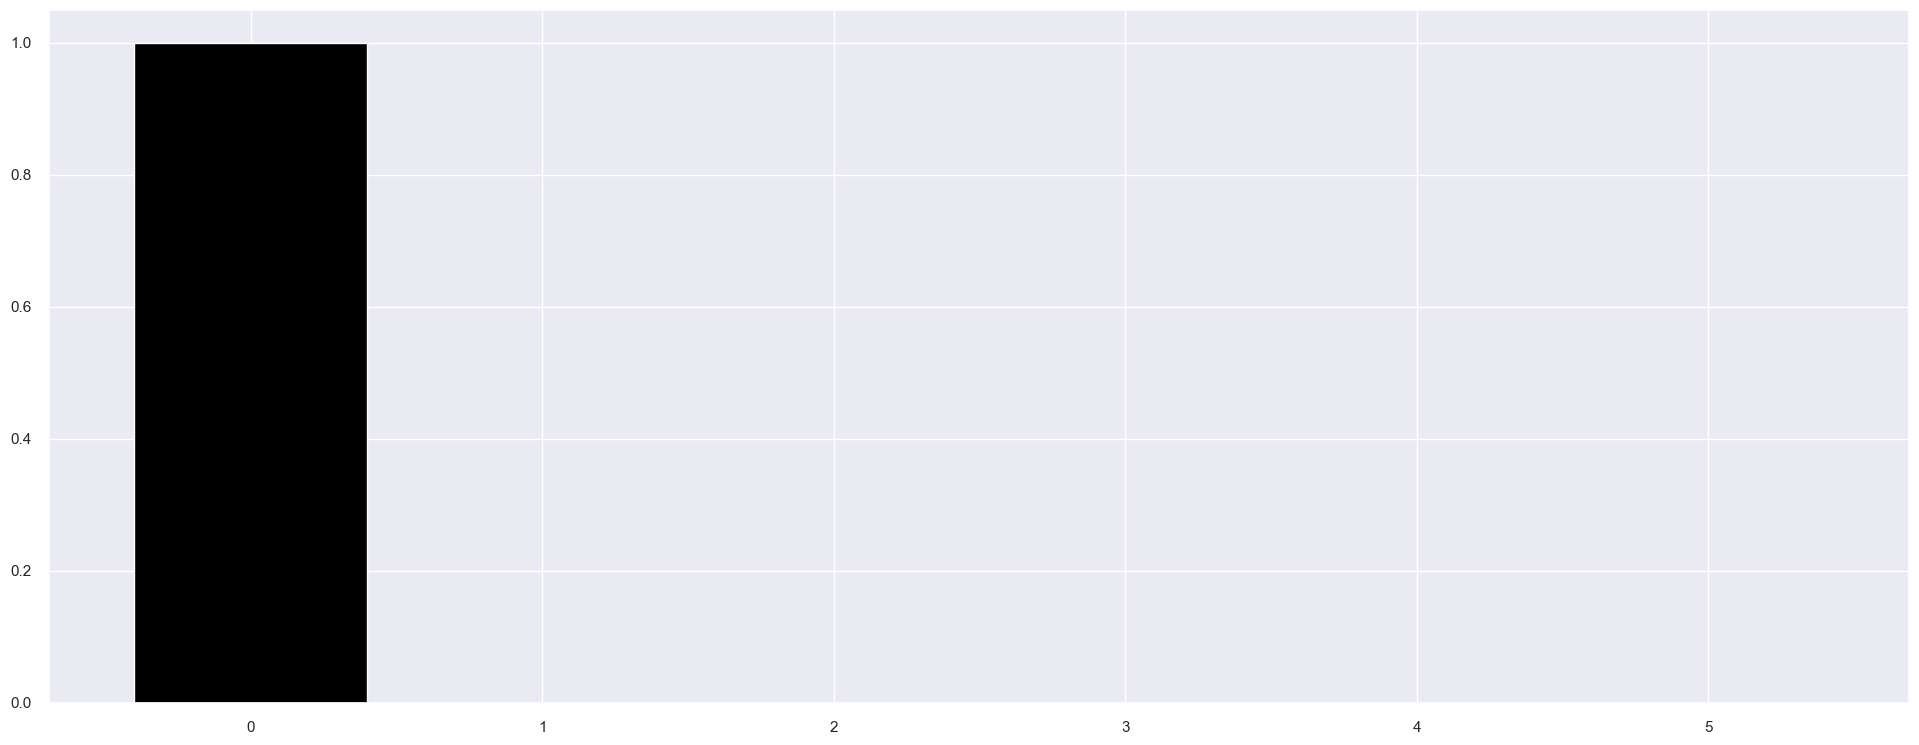

In [119]:
pca = dd.PCA( n_components=X.shape[1] )

principal_components = pca.fit_transform( X )

# plot explained variable
features = range( pca.n_components_ )

plt.bar( features, pca.explained_variance_ratio_ , color='black' )

# pca component
df_pca = pd.DataFrame( principal_components )

<AxesSubplot:xlabel='0', ylabel='1'>

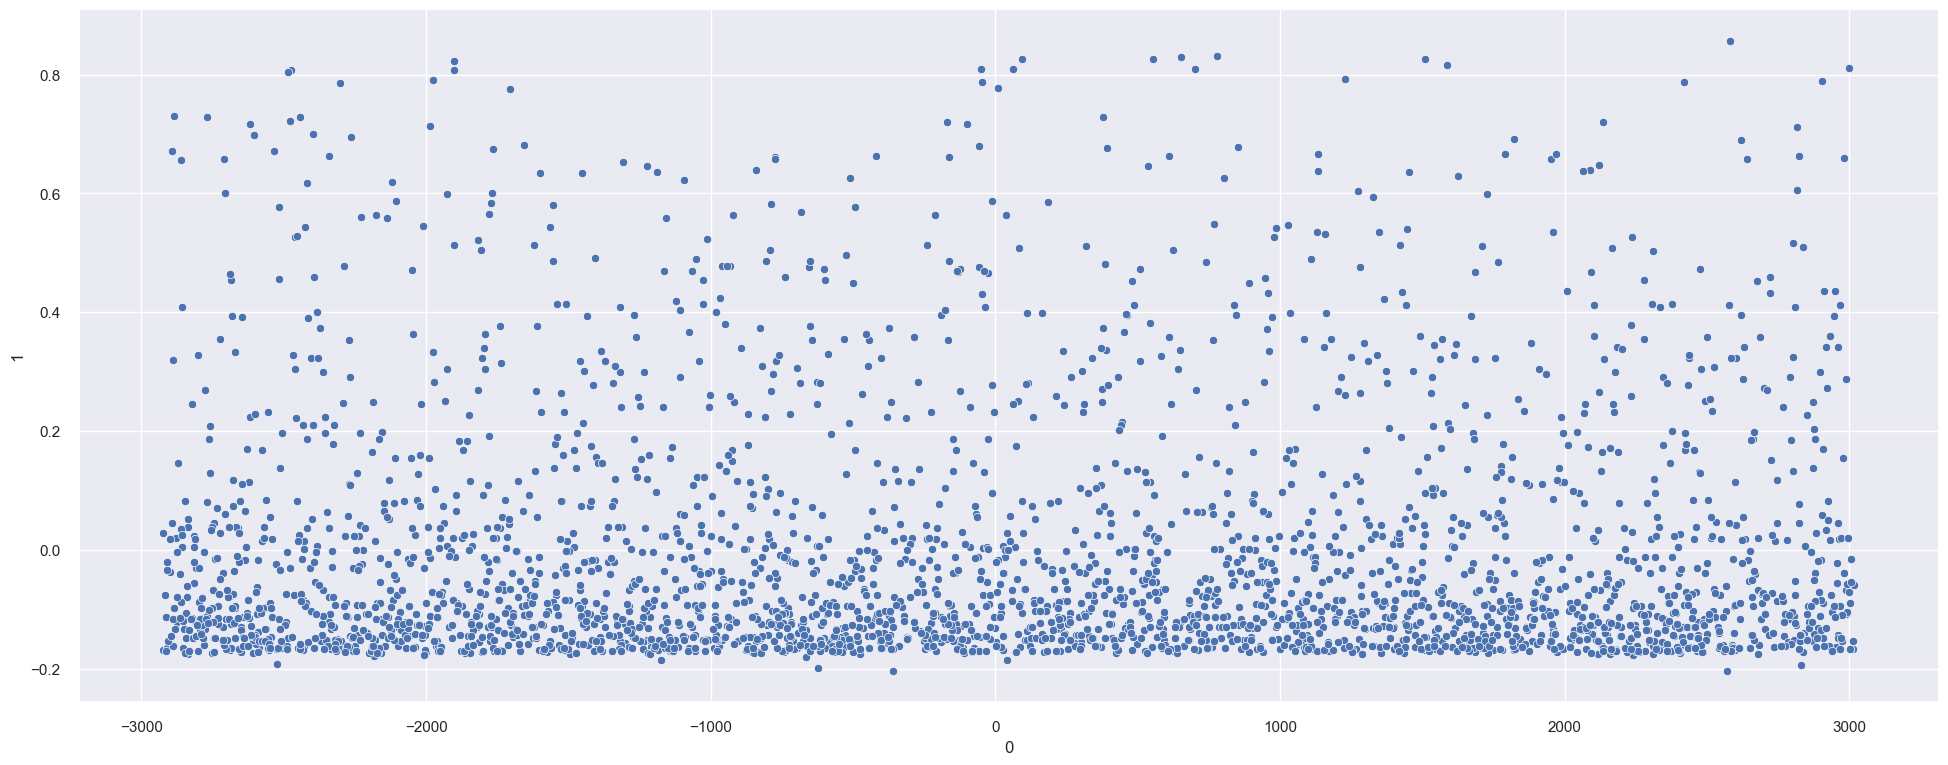

In [120]:
sns.scatterplot( x=0 , y=1, data=df_pca)

In [121]:
df_pca.head()

,0,1,2,3,4,5
0,2579.622979,0.856733,0.078571,-0.052547,-0.045383,0.960655
1,-2223.377022,-0.022794,0.003764,-0.003840,-0.001722,-0.004225
2,-2687.377022,-0.167898,0.012954,-0.004314,0.002124,0.001334
3,-1522.377022,0.082413,-0.010429,0.002939,0.003822,-0.007664
4,-170.377022,0.719939,0.009946,-0.003442,0.003301,-0.027095


### 4.3.2. UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

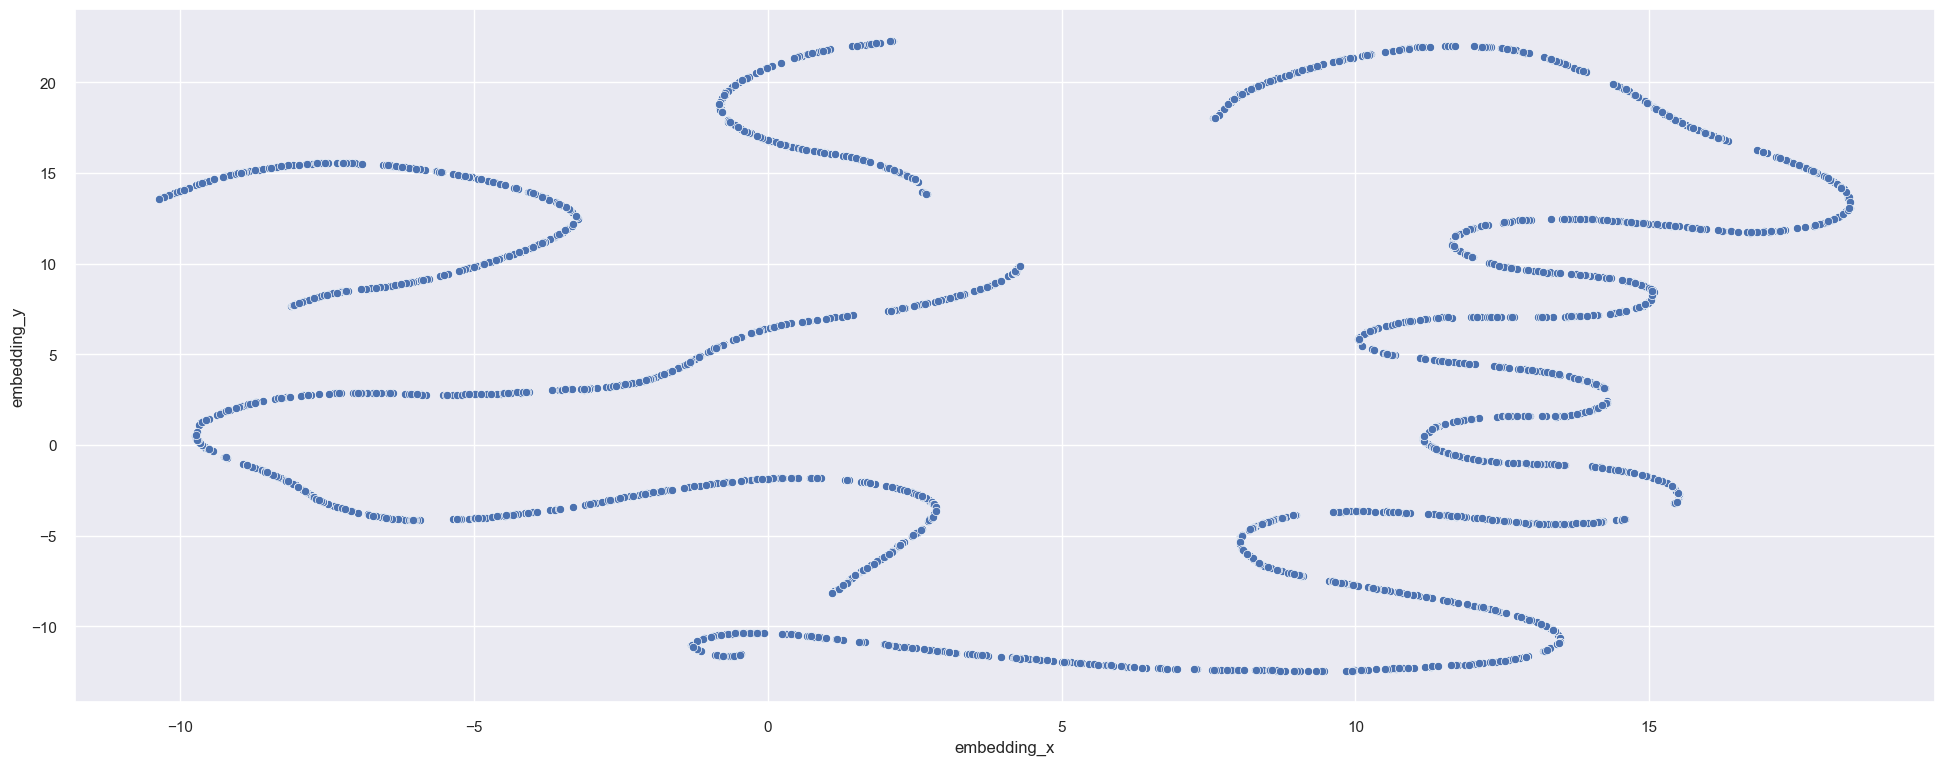

In [122]:
reducer = umap.UMAP( random_state = 42 )
embedding = reducer.fit_transform( X ) # espaço projetado

# embeddind
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', data=df_pca )

### 4.3.2. t-SNE

/Users/thiago/Thiago/Data_Science/comunidade_ds/insiders_clustering/ins_clustenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/thiago/Thiago/Data_Science/comunidade_ds/insiders_clustering/ins_clustenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

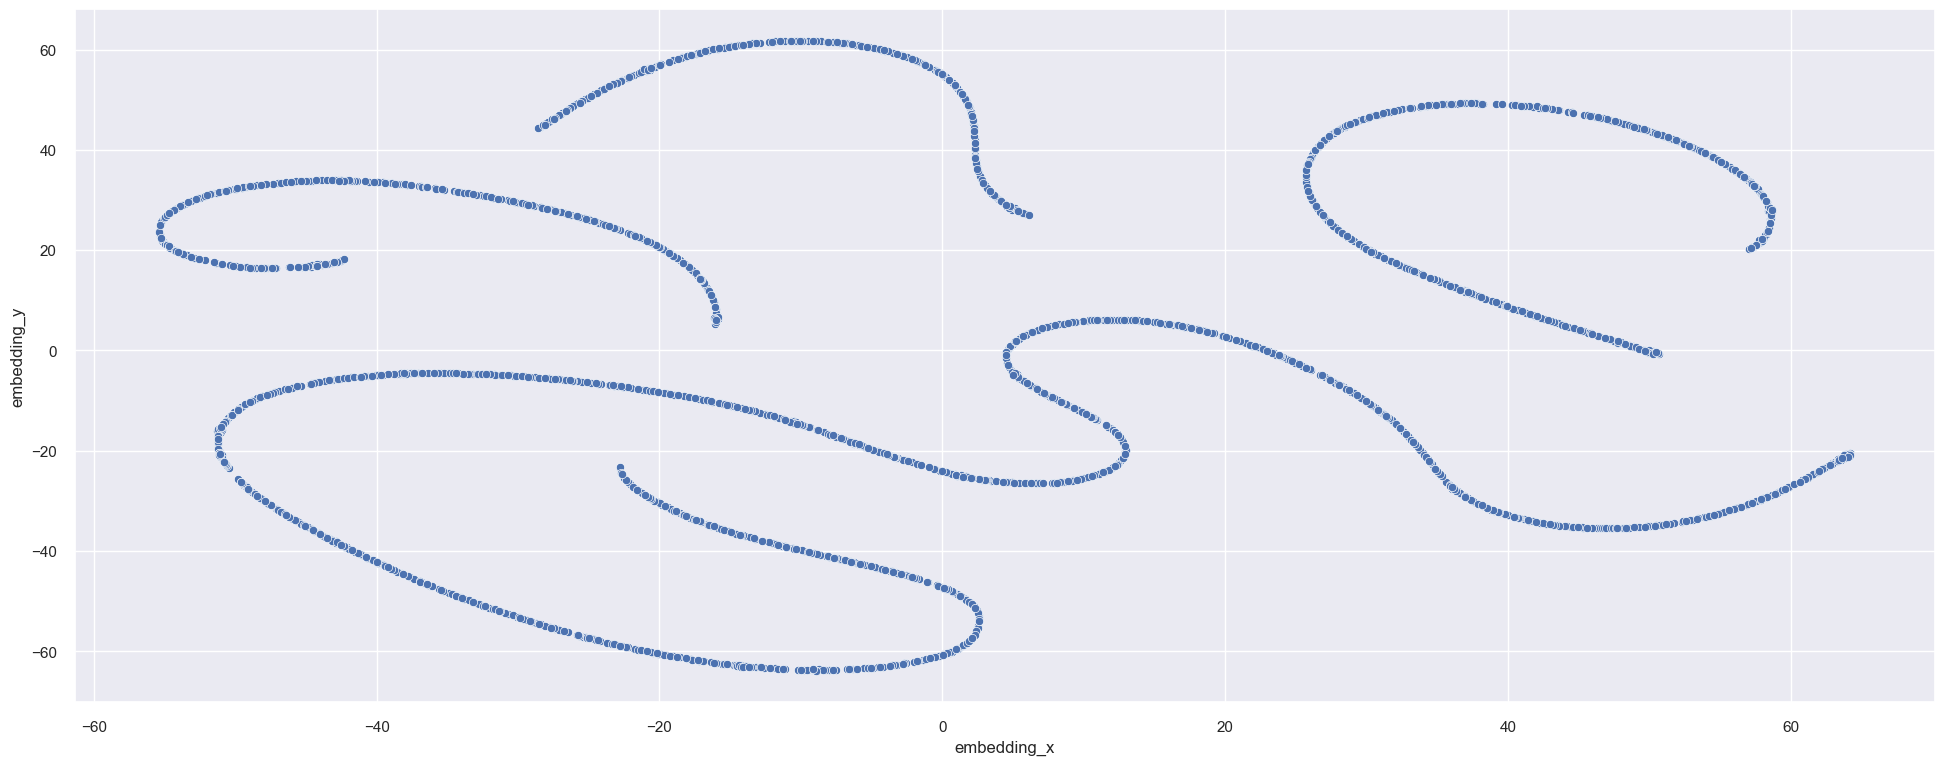

In [123]:
reducer = mn.TSNE( n_components=2, n_jobs=-1, random_state = 42 )
embedding = reducer.fit_transform( X ) # espaço projetado

# embeddind
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', data=df_pca )

### 4.3.3. Tree-Based Embedding

In [203]:
# training dataset
X = df43.drop( columns=['customer_id', 'gross_revenue'], axis=1 )
y = df43['gross_revenue']

# model definition
rf_model = en.RandomForestRegressor( n_estimators=100, random_state=42 )

# model training
rf_model.fit( X, y )

# Leaf

# dataframe Leaf

RandomForestRegressor(random_state=42)

In [204]:
df_leaf = pd.DataFrame( rf_model.apply( X ) )

In [205]:
df_leaf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,3466,3439,3726,3677,3655,3752,3611,3688,3684,3490,3668,3543,3545,3578,3553,3490,3316,3420,3407,3244,3527,3653,3637,3582,3500,3425,3283,3394,3394,3762,3305,3603,3336,3458,3561,3391,3487,3654,3458,3617,3502,3624,3646,3676,3413,3437,3500,3741,3593,3378,3567,3545,3517,3392,3744,3697,3394,3656,3437,3696,3484,3482,3534,3759,3641,3490,3496,3563,3513,3520,3708,3734,3642,3704,3711,3513,3647,3562,3649,3410,3577,3546,3505,3670,3467,3629,3666,3687,3624,3411,3450,3392,3421,3679,3588,3704,3667,3406,3622,3653
1,3334,3394,3600,3055,3024,3386,3150,3515,3314,3244,3048,3445,3306,3396,3497,3407,3289,3277,3323,3173,3360,3524,2894,2898,3370,3219,3274,3304,3254,3155,3244,3424,3316,3311,3316,3371,3372,3140,3058,3057,3361,3170,3065,3126,3381,3411,3298,3262,3338,3253,3145,3423,3509,2992,3511,3103,3333,3650,3202,3231,3359,3301,2964,3147,3452,3210,3068,2860,3412,3255,3180,3106,3163,2701,3290,3124,3227,3429,3367,3389,3282,3268,3370,3534,3340,3069,3276,3153,3045,3385,2810,3271,3056,2967,3407,2983,2976,3308,3023,3509
2,3517,2982,3627,3580,3555,3666,3282,3551,3329,3330,3613,3473,3422,3517,3470,3471,3021,3360,3447,3236,3476,3518,3268,3246,3401,3381,3030,3350,3206,3659,3248,3414,3297,3495,3512,3467,3534,3580,3482,3536,3556,3224,3553,3562,3316,3423,3355,3239,3540,3380,3558,3500,3452,3467,3566,3645,3486,3534,3210,3311,3491,3440,3522,3638,3492,3442,3247,3560,3456,3001,3642,3646,3655,3621,3051,3509,3273,3505,3397,3075,3261,3221,3399,3558,3406,3560,3291,3713,3331,3434,3420,3341,3477,3531,3527,3590,3042,3381,3537,3584
3,1127,543,1214,307,854,346,537,933,1296,1146,814,361,569,465,1075,820,927,720,379,1104,564,393,1254,426,466,587,1233,646,1161,326,621,544,1212,985,1159,1041,1426,397,399,1281,591,1262,1031,540,1138,1022,588,469,722,971,407,386,1115,601,1504,1154,313,531,785,364,649,970,996,1268,1131,315,497,869,323,1107,671,1254,360,1471,1257,665,607,1209,1236,387,1164,1135,1042,1158,374,971,978,957,750,1130,538,1545,576,600,1057,1308,568,523,924,890
4,436,631,377,889,911,778,1022,36,562,485,143,511,50,714,528,460,544,1104,719,574,688,91,135,712,888,740,83,925,544,1690,59,652,596,336,473,493,361,1242,717,735,676,752,620,68,528,387,784,647,987,731,825,706,322,1022,536,496,1025,95,122,1035,1059,716,591,499,543,622,603,360,631,600,961,774,948,86,106,911,973,512,502,651,53,104,105,717,658,508,493,725,1055,506,894,611,877,700,763,468,689,882,1318,461


In [206]:
df_leaf.shape

(2968, 100)

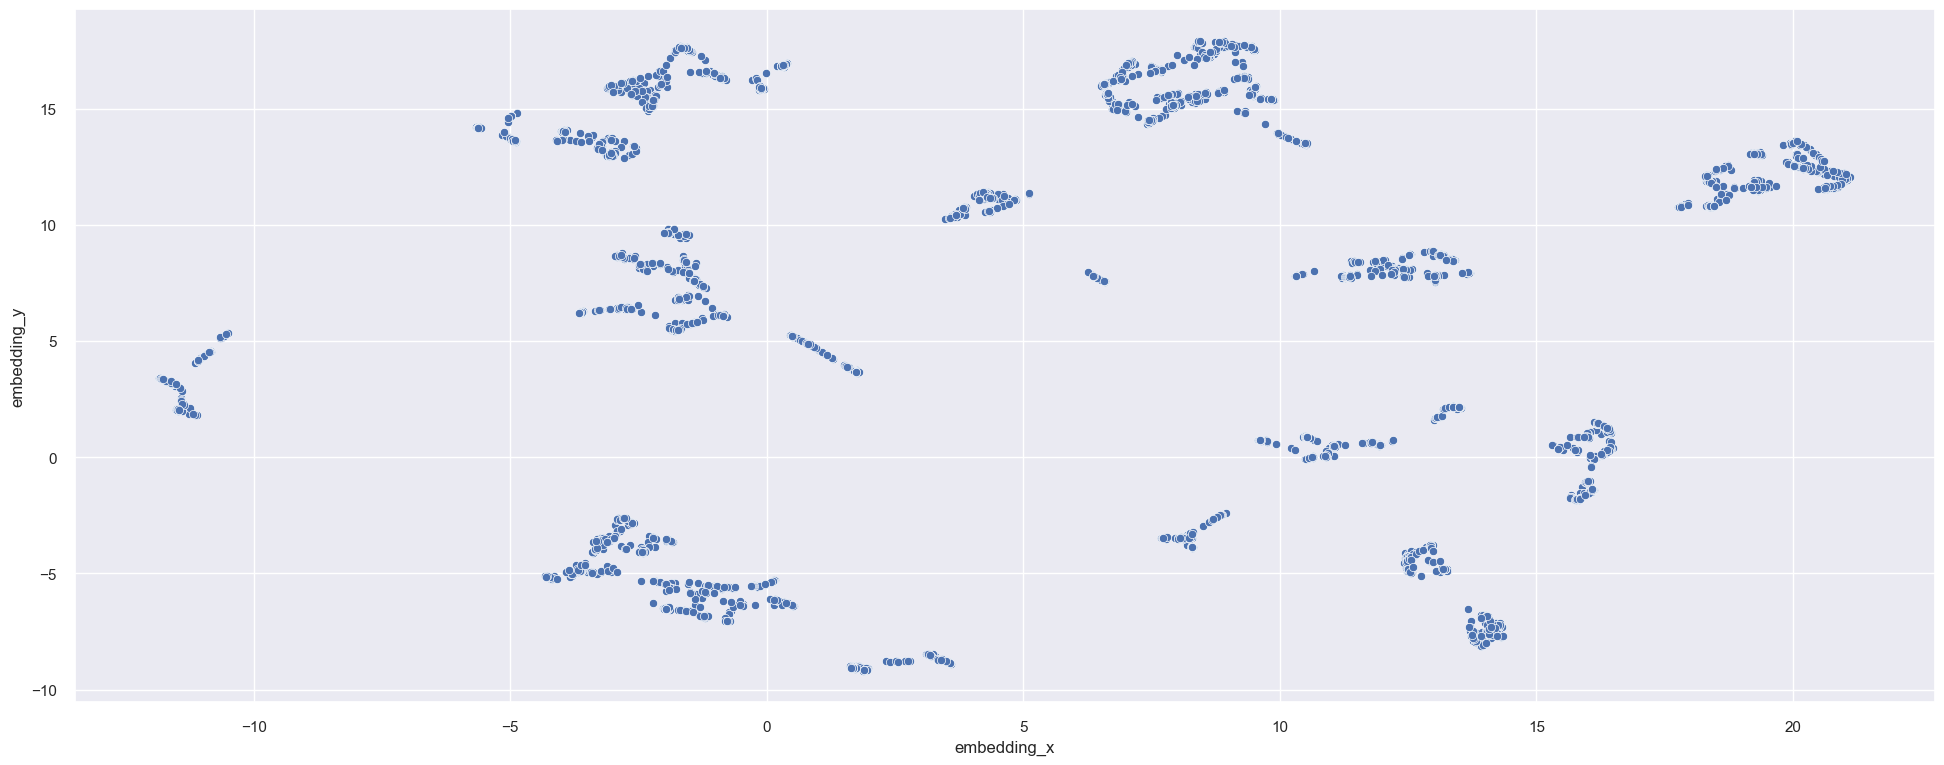

In [207]:
# Reduzer dimensionality
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( df_leaf )

# embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x',
                 y='embedding_y',
                 data=df_tree );

## <font color='red'> 5.0. Data Preparation</font>

** Regra do Coração **

Padronização ( Standardization ) -> premissa de que os dados vieram de uma distribuição normal

Rescala ( Rescale ) -> não premissa que dos dados vieram de uma distribuição normal


1. Distribuição normal e não possui outlier => Standard Scaler
2. Distribuição nirmal e possui outlier => Robust Scaler - Quartis
3. Não possui distribuição normal => MinMax Scaler





QQ Plot -  Quantile Quantile Plot ( Quantile teorica x Quantile real )

KS Teste - Kolgomorov Smirnoff ( Teste de Hipótese ) Se p-value > 0.5 -> Distribuição Normal / Se p-value < 0.5 -> Distribuição não Normal

Normalização -> ( Dinheiro - Media(dinheiro) ) / desvio padrão(dinheiro) = Dinheiro / Dinheiro = Adimensional

Rescala -> ( Dinheiro - Min(dinheiro) ) / Max(dinheiro) - Min(dinheiro) = Dinheiro / Dinheiro = Adimensional


** Detecção do Outlier **

Box Plot -> Pontos são identificados como outliers
IRQ * 2.5 -> Acima desse valor ( Outlier ) 

Z-Score > 3 Outliers
Z-Score < -3 Outliers

In [208]:
#df5 = df4.copy()
#df5_aux = df4.copy()
df5 = df_tree.copy()

In [130]:
#sns.distplot( np.log( df5['gross_revenue'] ), kde=False)

In [ ]:
mm = pp.MinMaxScaler()
ss = pp.StandardScaler()
rs = pp.RobustScaler()

df5['gross_revenue'] = mm.fit_transform( df5[['gross_revenue']])
df5['recency_days'] = mm.fit_transform( df5[['recency_days']])
#df5['qtde_invoices'] = mm.fit_transform( df5[['qtde_invoices']])
#df5['qtde_items'] = mm.fit_transform( df5[['qtde_items']])
df5['qtde_products'] = mm.fit_transform( df5[['qtde_products']])
#df5['avg_ticket'] = mm.fit_transform( df5[['avg_ticket']])
#df5['avg_recency_days'] = mm.fit_transform( df5[['avg_recency_days']])
df5['frequency'] = mm.fit_transform( df5[['frequency']])
df5['qtde_returns'] = mm.fit_transform( df5[['qtde_returns']])
#df5['avg_basket_size'] = mm.fit_transform( df5[['avg_basket_size']])
#df5['avg_unique_basket_size'] = mm.fit_transform( df5[['avg_unique_basket_size']])

# *** removemos algumas features de média, pois no final os dados apresentados na formação final dos clusters, serão as médias do cluster, assim calcular a média da média não faz sentido.

### 5.1. Data Test

In [131]:
variable = 'avg_ticket'

Min:2.150588235294118 - Max:4453.43


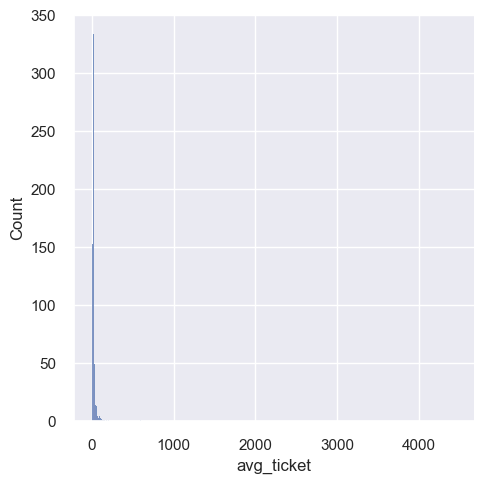

In [202]:
# Dados AS IS
print( 'Min:{} - Max:{}'.format( df5_aux[variable].min(), df5_aux[variable].max() ) )
sns.displot( df5_aux[ variable] );

Min:0.0 - Max:1.0


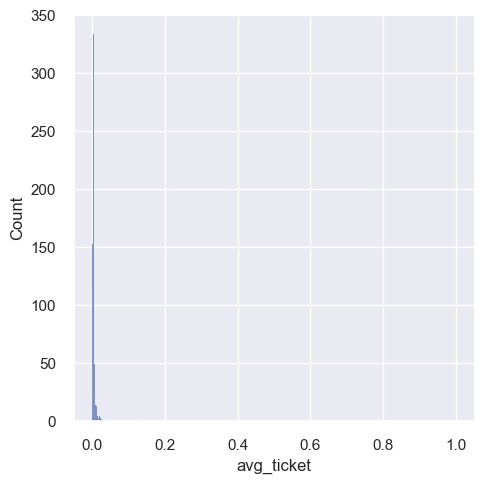

In [203]:
# Dados Normalizados/Rescalados
print( 'Min:{} - Max:{}'.format( df5[variable].min(), df5[variable].max() ) )
sns.displot( df5[ variable] );

/Users/thiago/Thiago/Data_Science/comunidade_ds/insiders_clustering/ins_clustenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


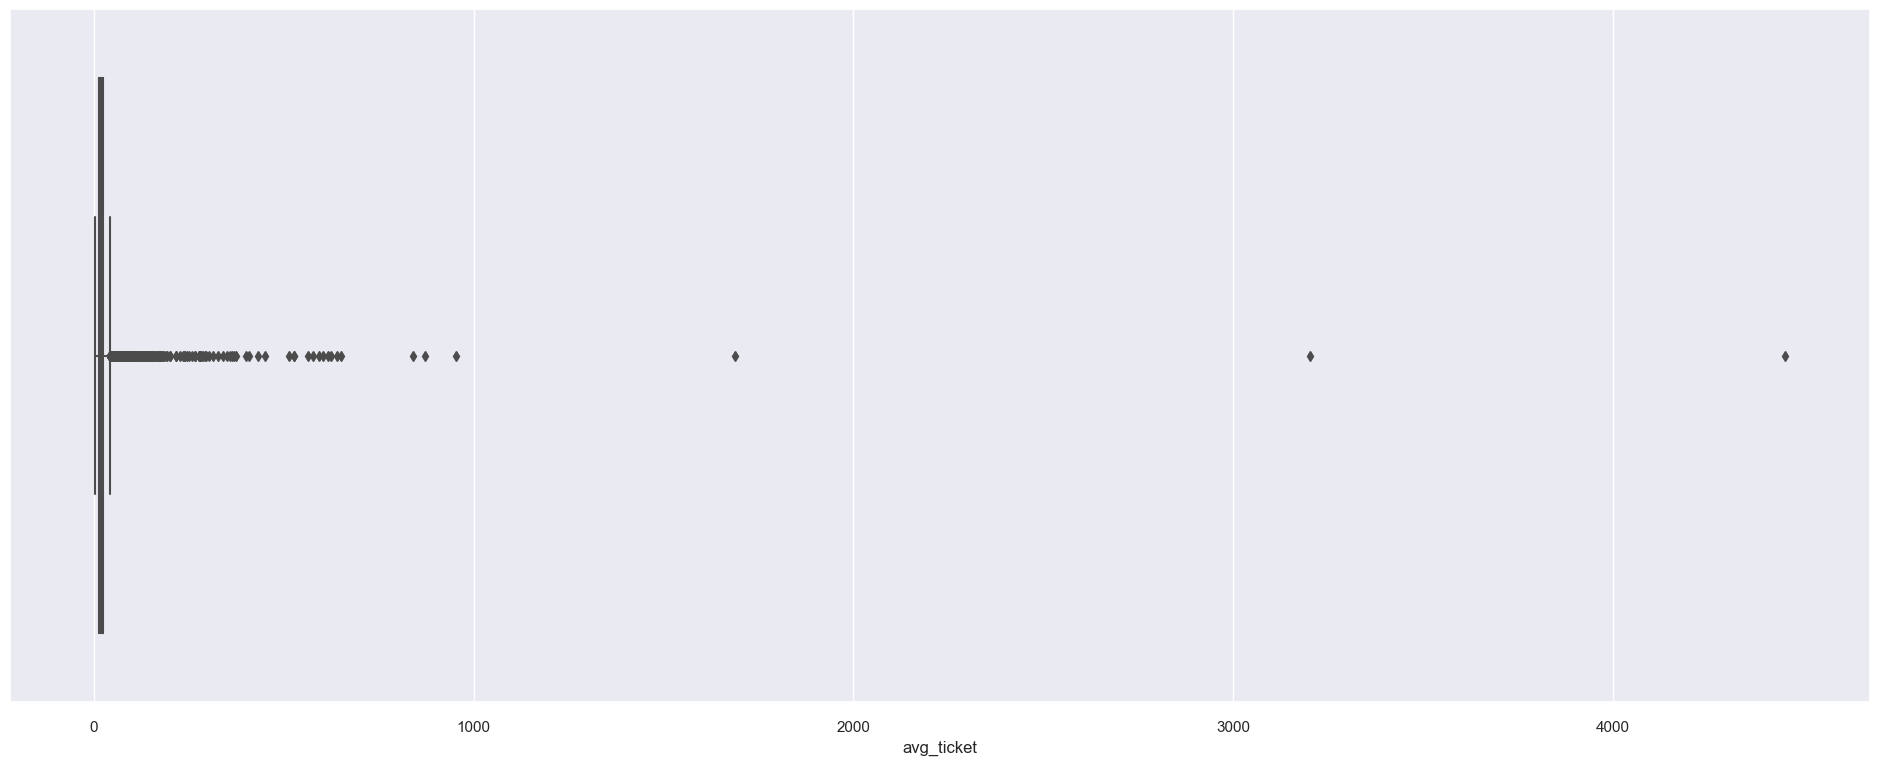

In [204]:
# BoxPlot
sns.boxplot( df5_aux[variable] );

## <font color='red'> 6.0. Feature Selection</font>

In [132]:
cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'qtde_products', 'frequency', 'qtde_returns']

In [133]:
#df6 = df5[ cols_selected ].copy()
df6 = df_tree.copy()

## <font color='red'> 7.0. Hyperparameter Fine-Tunning </font>

In [210]:
#X = df6.drop( columns=['customer_id'] )
X = df_tree.copy()

In [211]:
X.head()

,embedding_x,embedding_y
0,-1.794532,-5.616612
1,-11.619191,3.220745
2,-1.727290,-6.593994
3,12.381402,8.551535
4,15.797197,0.220842


In [212]:
#clusters = [2, 3, 4, 5, 6, 7, 8, 9]
clusters = np.arange( 2, 25, 1)

## 7.1. K-Means

In [213]:
kmeans_list = []
for k in clusters:
    # model definition
    kmeans_model = c.KMeans( n_clusters=k )

    # model training
    kmeans_model.fit( X )

    # model predict
    labels = kmeans_model.predict( X )

    # model performance
    sil = m.silhouette_score( X, labels, metric='euclidean' )
    kmeans_list.append( sil )

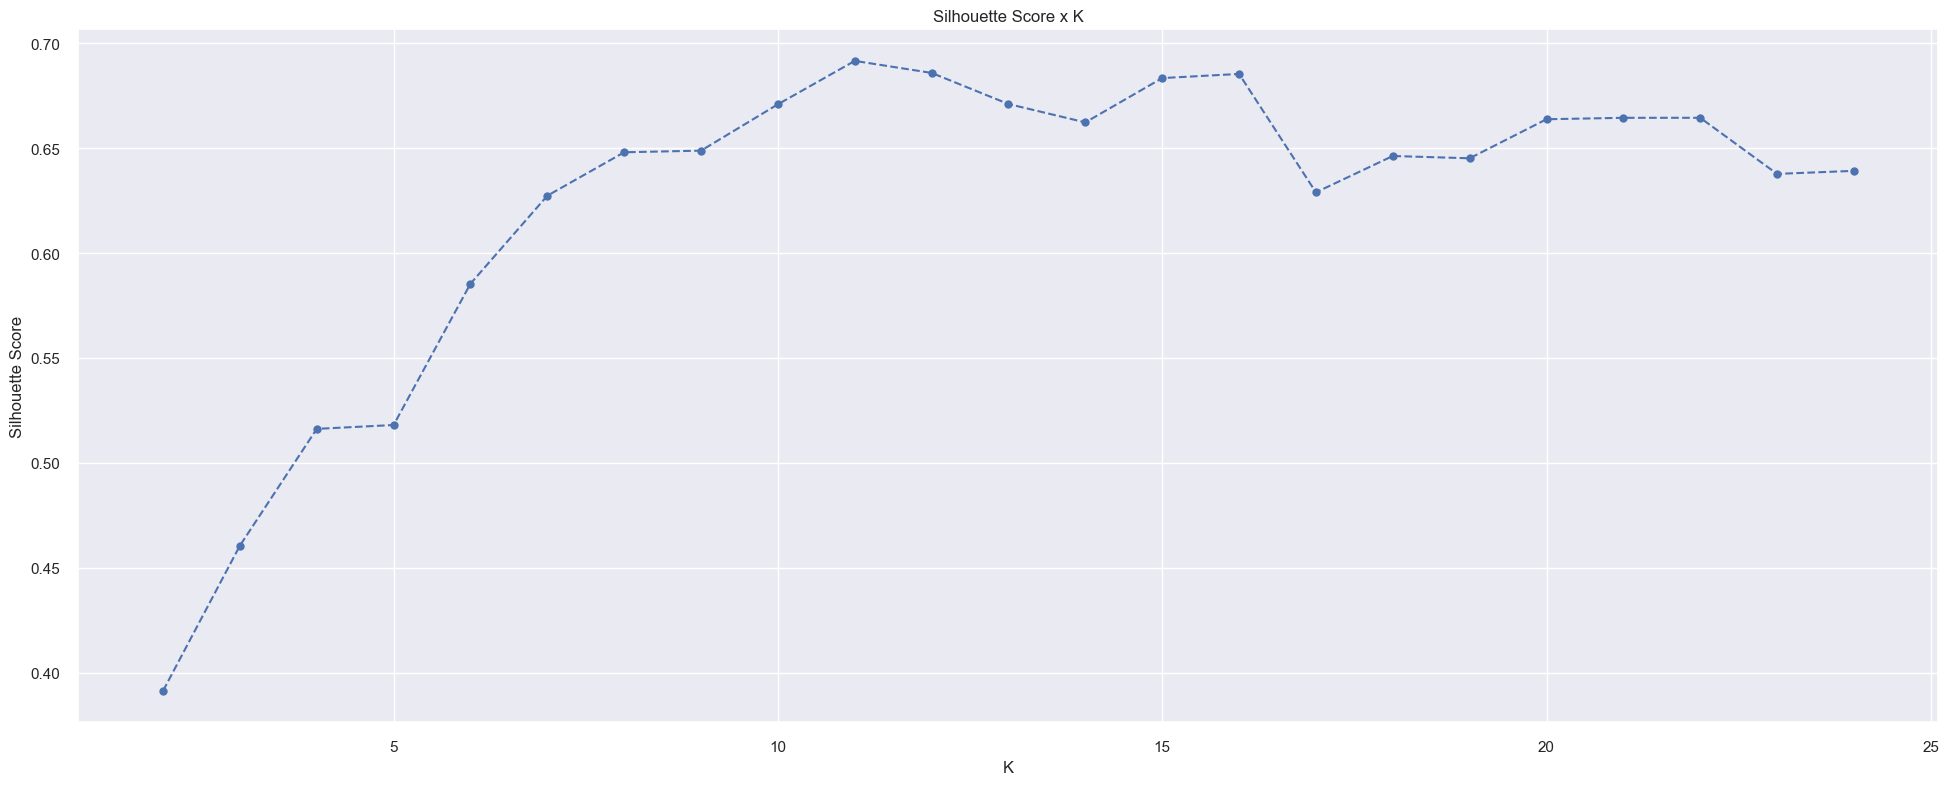

In [214]:
plt.plot( clusters, kmeans_list, linestyle='--', marker='o', color='b' )
plt.xlabel( 'K' ); 
plt.ylabel( 'Silhouette Score' );
plt.title( 'Silhouette Score x K' );

## 7.2. GMM

AIC - Ajuste dos Dados


BIC - Ajuste dos Parâmetros

In [215]:
gmm_list = []
for k in clusters:
    # model definition
    gmm_model = mx.GaussianMixture( n_components=k )

    # model training
    gmm_model.fit( X )

    # model predict
    labels = gmm_model.predict( X )

    # model performance
    sil = m.silhouette_score( X, labels, metric='euclidean' )
    gmm_list.append( sil )

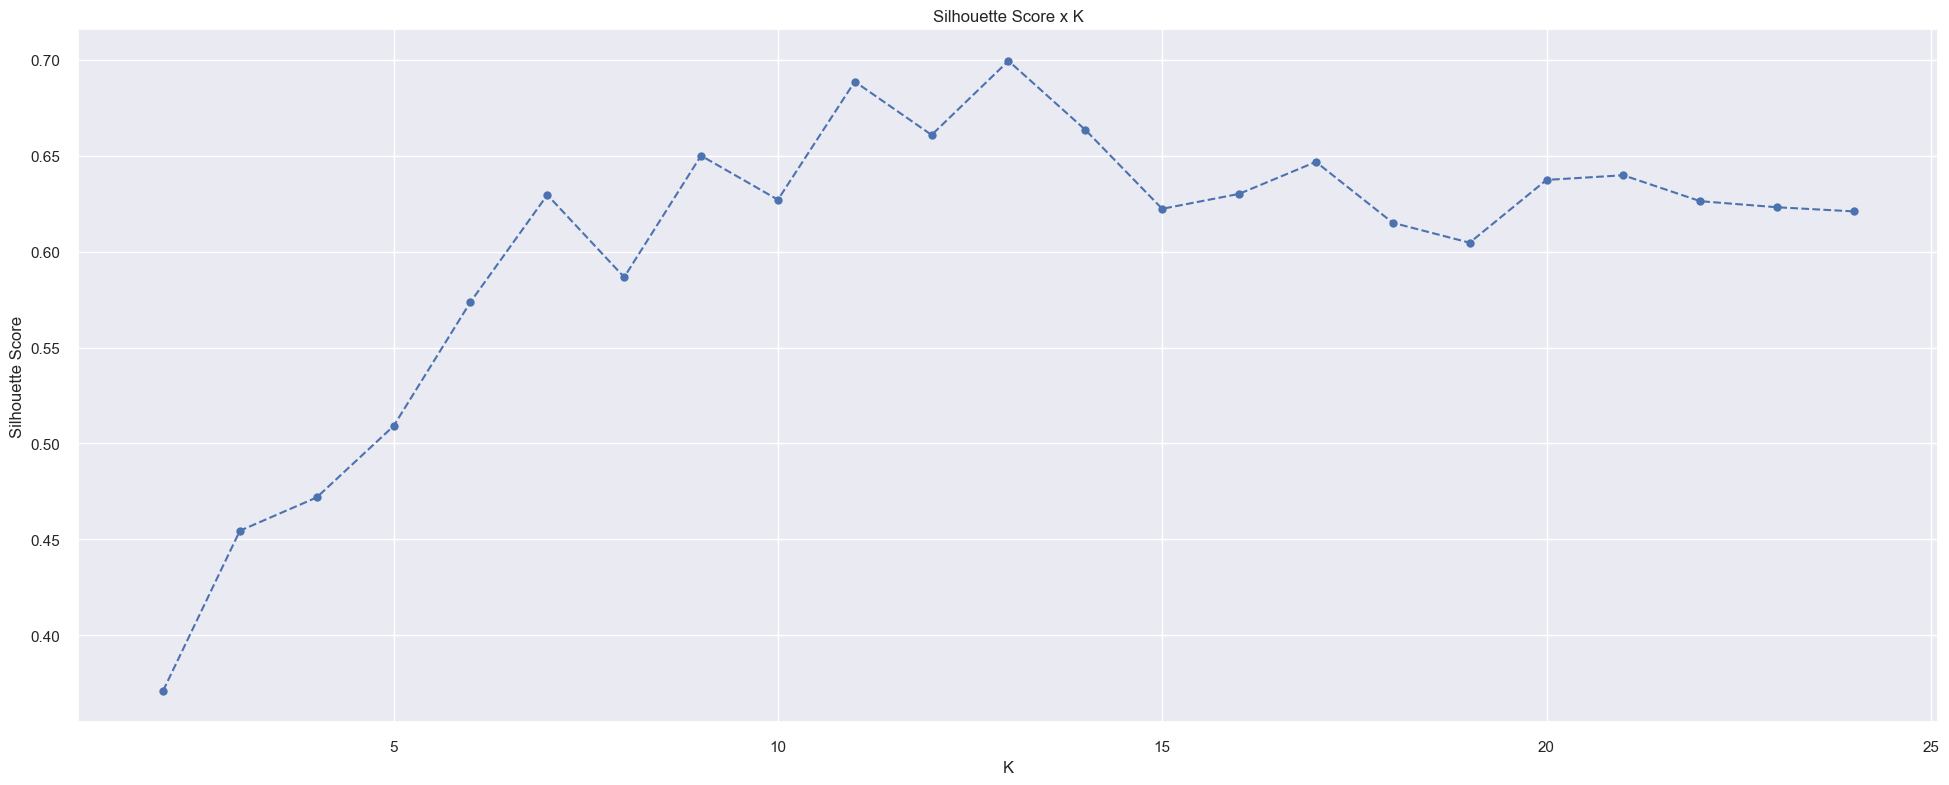

In [216]:
plt.plot( clusters, gmm_list, linestyle='--', marker='o', color='b' )
plt.xlabel( 'K' ); 
plt.ylabel( 'Silhouette Score' );
plt.title( 'Silhouette Score x K' );

In [217]:
gmm_list

[0.3710722,
 0.45452774,
 0.47189912,
 0.5091129,
 0.5737173,
 0.62954396,
 0.58667755,
 0.6499951,
 0.6270311,
 0.68860745,
 0.66079205,
 0.69938916,
 0.66344434,
 0.62229866,
 0.630081,
 0.6467579,
 0.615018,
 0.6046458,
 0.63736206,
 0.63978606,
 0.6262747,
 0.62310755,
 0.6209545]

## 7.3. Hierarchical Clustering

In [218]:
# model definition
hc_model = hc.linkage( X, 'ward' )

[]

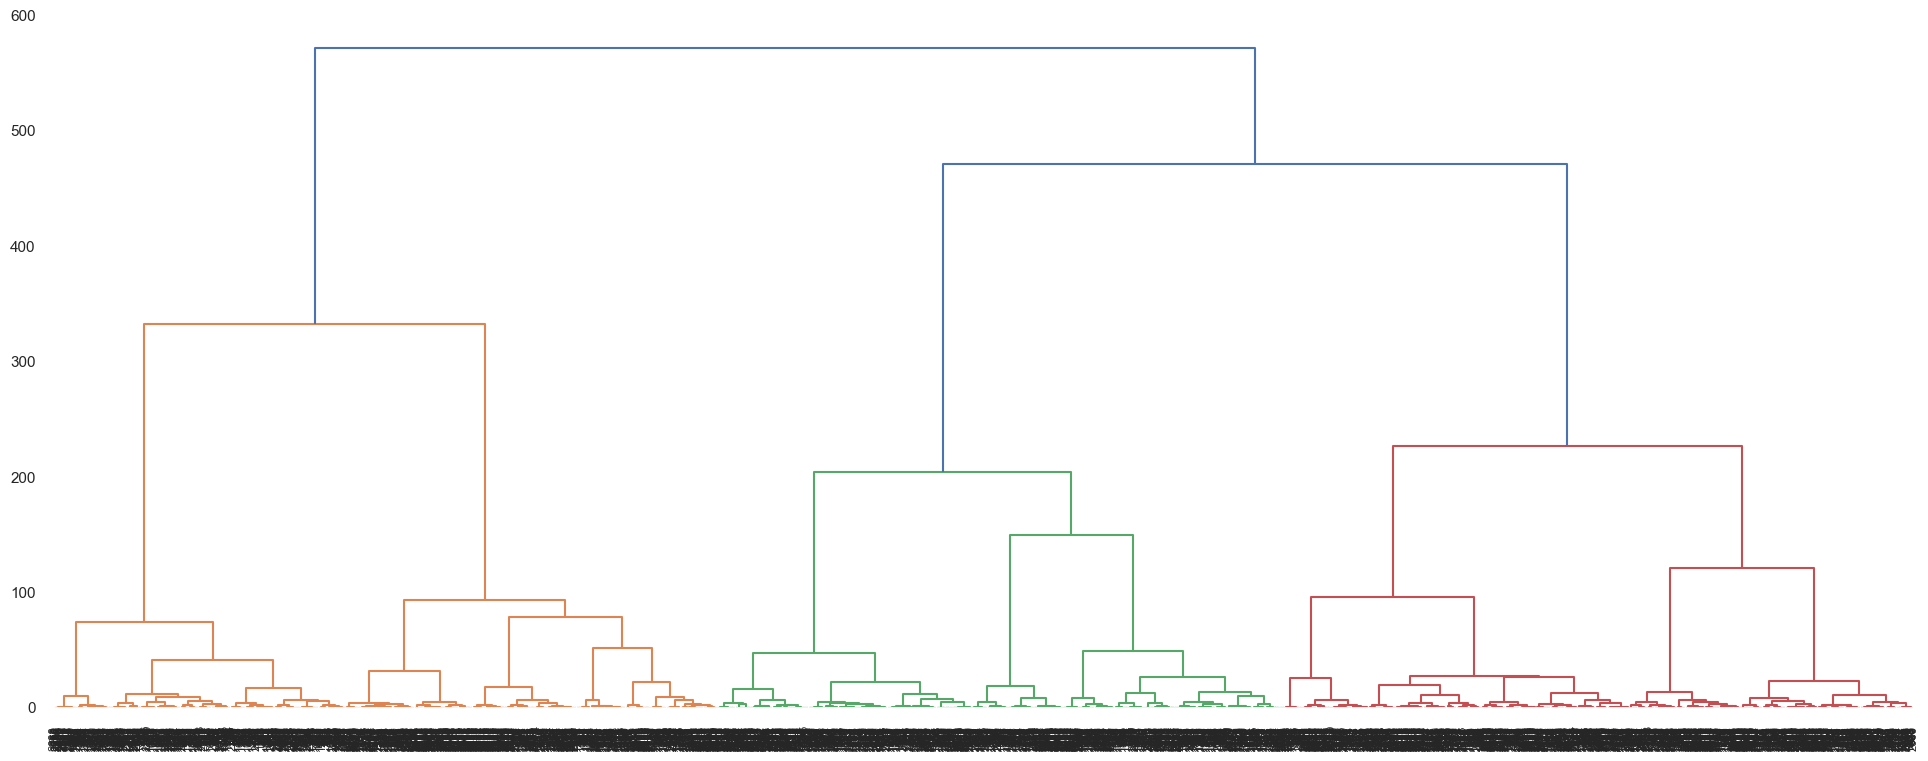

In [219]:
hc.dendrogram(
    hc_model,
    leaf_rotation=90,
    leaf_font_size=8
)

plt.plot()

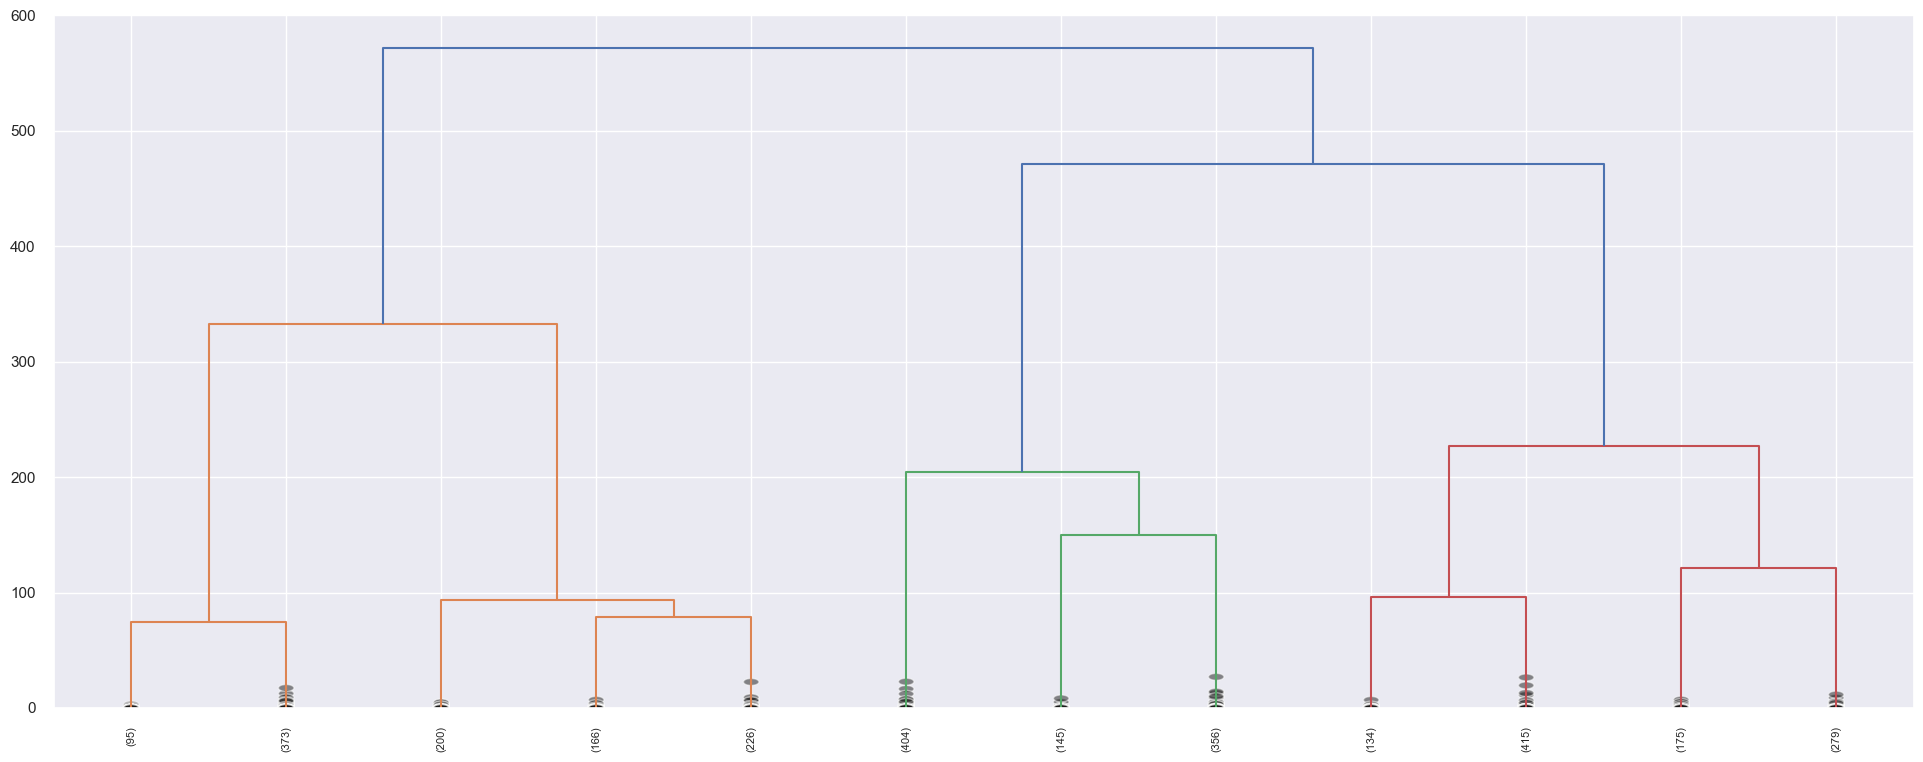

In [220]:
hc.dendrogram(
    hc_model,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90,
    leaf_font_size=8,
    show_contracted=True
)

plt.show()

### 7.3.1. Hierarchical Clustering Silhouette Score

In [221]:
hc_list = []
for k in clusters:
    # model definition & training
    hc_model = hc.linkage( X, 'ward')

    # model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # metrics
    sil = m.silhouette_score( X, labels, metric='euclidean' )
    hc_list.append( sil )

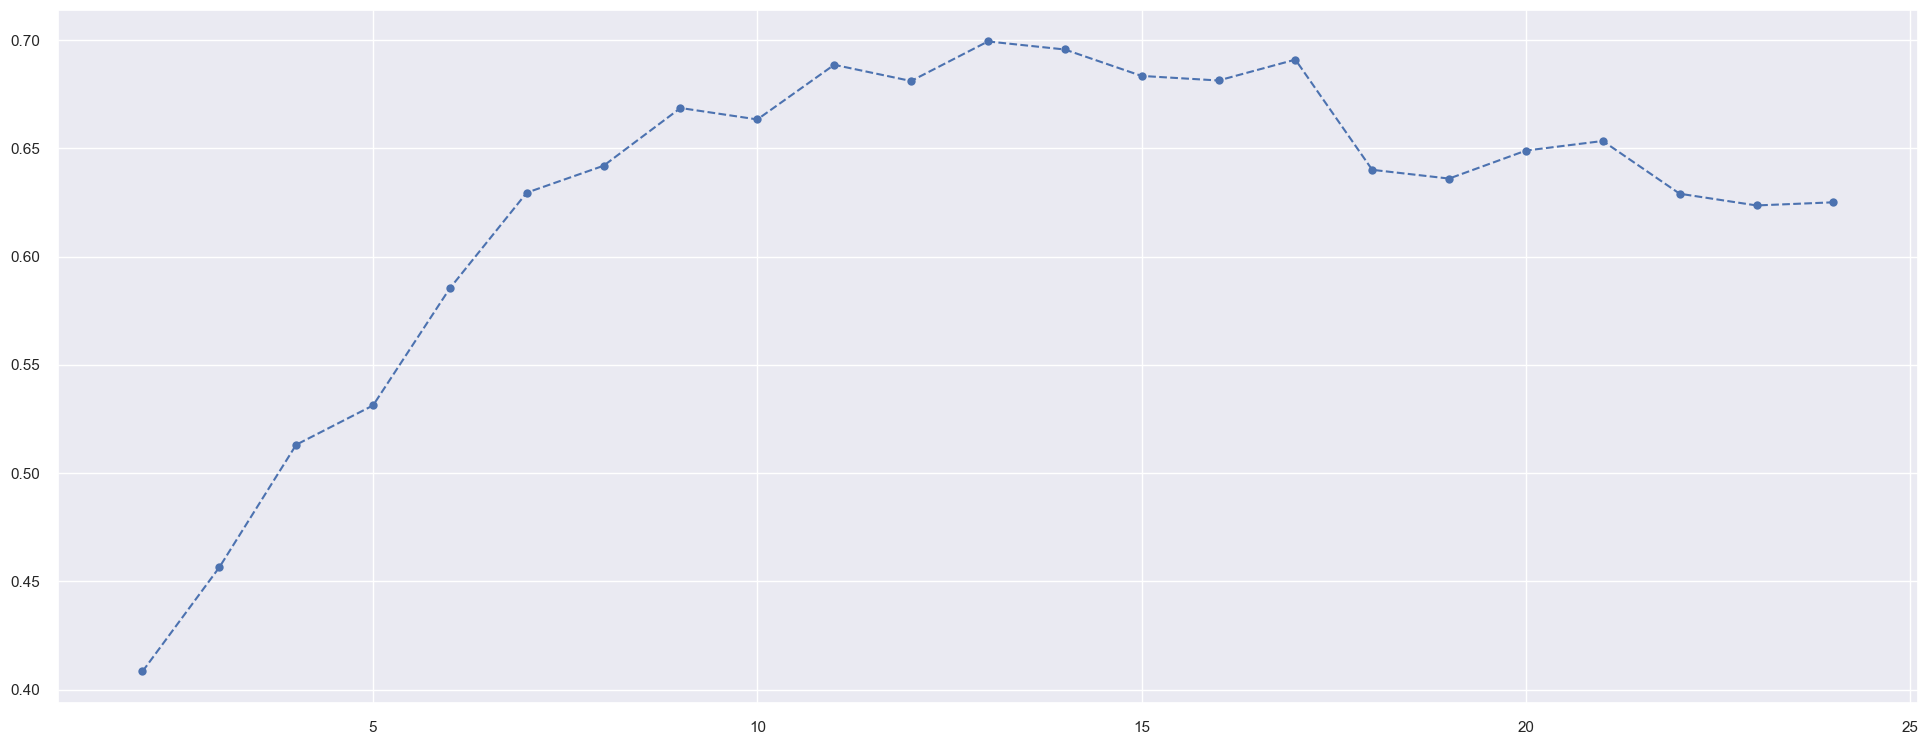

In [222]:
plt.plot( clusters, hc_list, linestyle='--', marker='o', color='b' )

## 7.4. DBSCAN

In [223]:
eps = 0.2
min_samples = 20

# model definition
dbscan_model = c.DBSCAN( eps=eps, min_samples=min_samples )

# model training & predict
labels = dbscan_model.fit_predict( X )

sil = m.silhouette_score( X, labels, metric='euclidean' )
print( 'Silhouette Score: {}'.format( sil ) )
print( 'Number of Clusters: {}'.format( len( unique( labels ) ) ) )
print( unique( labels ) )

Silhouette Score: 0.007099371403455734
Number of Clusters: 56
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54]


In [224]:
unique( labels )

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54])

In [225]:
neighbors = NearestNeighbors( n_neighbors=min_samples ).fit( X )
distances, indices = neighbors.kneighbors( X )

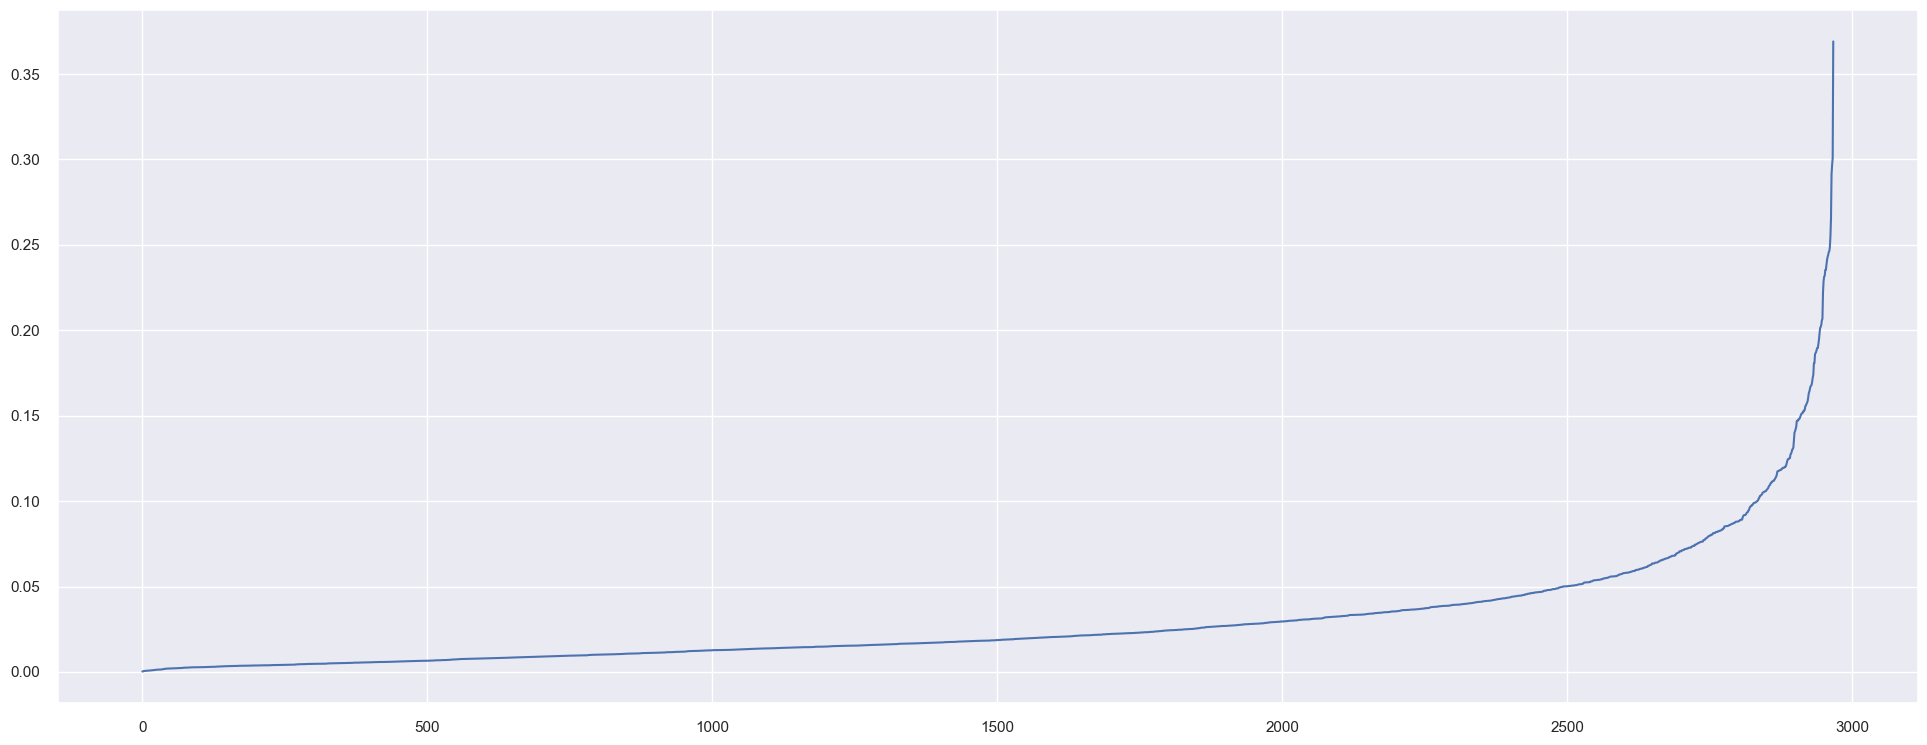

In [226]:
 distances = np.sort( distances, axis=0 )
 distances = distances[:,1]
 plt.plot( distances )

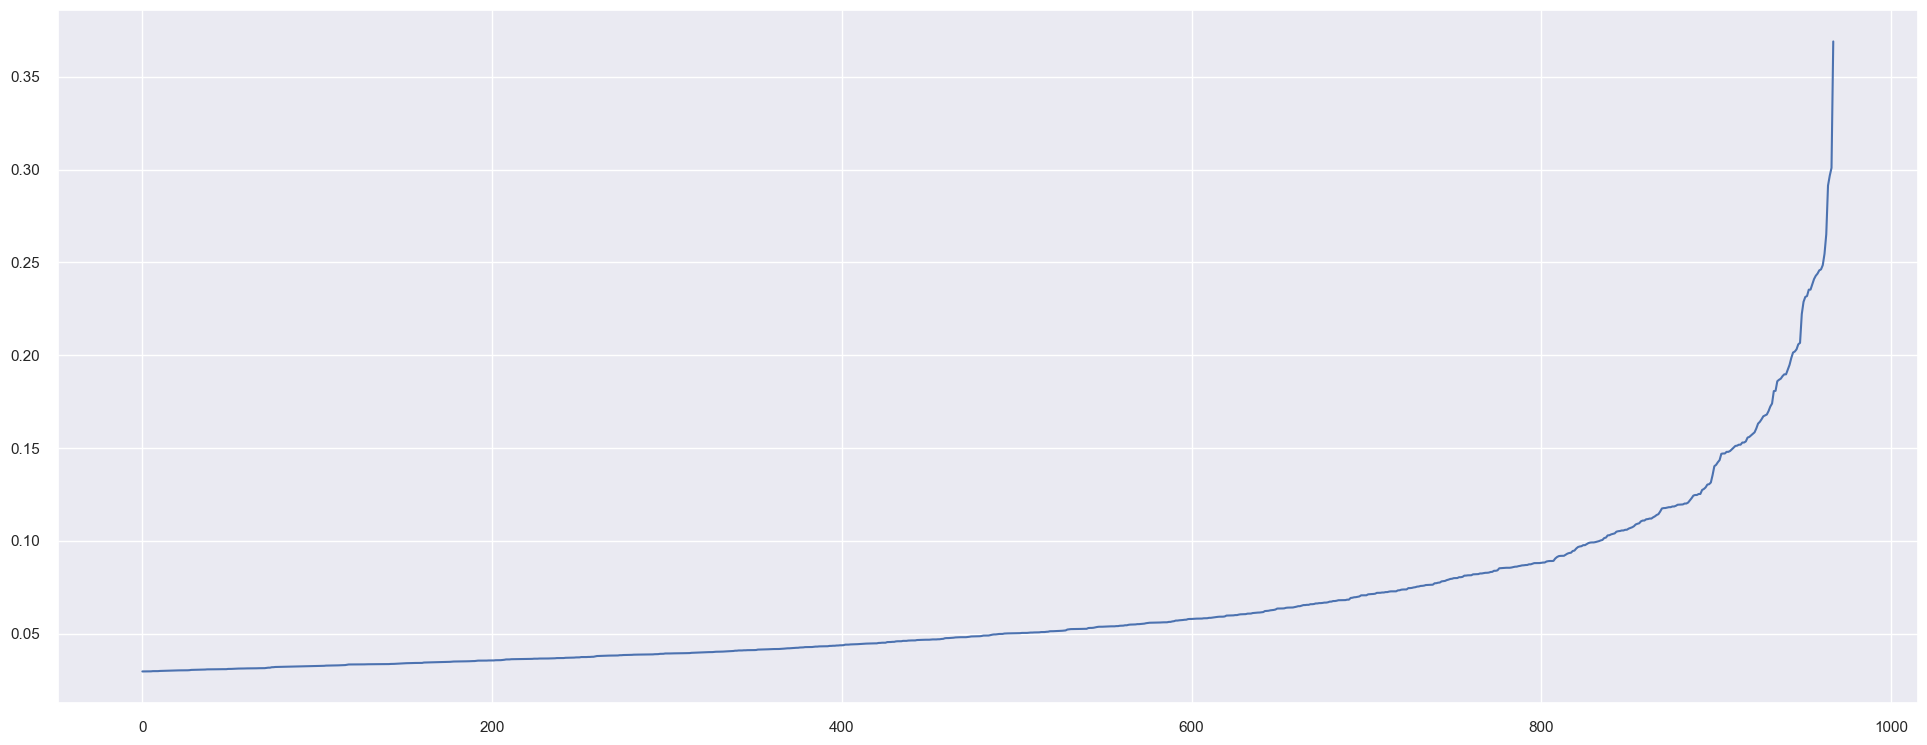

In [227]:
plt.plot( distances[2000:])

In [152]:
dbscan_list = [ 0.622016, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000 ]

## 7.5. Results

In [228]:
# Model Name | k=2 | k=3 | k=4 | k=5 | ...
# K-Means       ss    ss    ss   ss
# GMM           ss    ss    ss   ss
# HC            ss    ss    ss   ss
# DBSCAN        ss    ss    ss   ss

df_results = pd.DataFrame(
    {'Kmeans': kmeans_list,
     'GMM': gmm_list,
      'HC': hc_list}
      #'DBSCAN': dbscan_list }
 ).T

df_results.columns = clusters


In [229]:
df_results.style.highlight_max( color='lightgreen', axis=1)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Kmeans,0.391272,0.460524,0.516206,0.518045,0.585414,0.627375,0.648094,0.648866,0.670966,0.691662,0.685927,0.671091,0.662342,0.683462,0.685445,0.628987,0.646315,0.645221,0.663837,0.664522,0.664529,0.637782,0.639231
GMM,0.371072,0.454528,0.471899,0.509113,0.573717,0.629544,0.586678,0.649995,0.627031,0.688607,0.660792,0.699389,0.663444,0.622299,0.630081,0.646758,0.615018,0.604646,0.637362,0.639786,0.626275,0.623108,0.620955
HC,0.408414,0.456502,0.513124,0.531278,0.585414,0.629544,0.641989,0.668648,0.663366,0.688607,0.681113,0.699389,0.695673,0.683462,0.681354,0.690995,0.640097,0.636053,0.648986,0.653415,0.629056,0.623644,0.625093


### 7.1. Silhouette Analysis

For K = 2. Silhouette Score: 0.40841418504714966
For K = 3. Silhouette Score: 0.45650163292884827
For K = 4. Silhouette Score: 0.5131244659423828
For K = 5. Silhouette Score: 0.5312784314155579
For K = 6. Silhouette Score: 0.5854135751724243
For K = 7. Silhouette Score: 0.6295439600944519
For K = 8. Silhouette Score: 0.6419894695281982
For K = 9. Silhouette Score: 0.668647825717926
For K = 10. Silhouette Score: 0.6633660197257996
For K = 11. Silhouette Score: 0.6886074542999268
For K = 12. Silhouette Score: 0.6811131238937378
For K = 13. Silhouette Score: 0.6993891596794128
For K = 14. Silhouette Score: 0.6956726312637329
For K = 15. Silhouette Score: 0.6834620833396912
For K = 16. Silhouette Score: 0.6813536882400513
For K = 17. Silhouette Score: 0.6909947991371155
For K = 18. Silhouette Score: 0.6400967836380005
For K = 19. Silhouette Score: 0.6360527873039246
For K = 20. Silhouette Score: 0.6489861011505127
For K = 21. Silhouette Score: 0.6534149646759033
For K = 22. Silhouette Scor

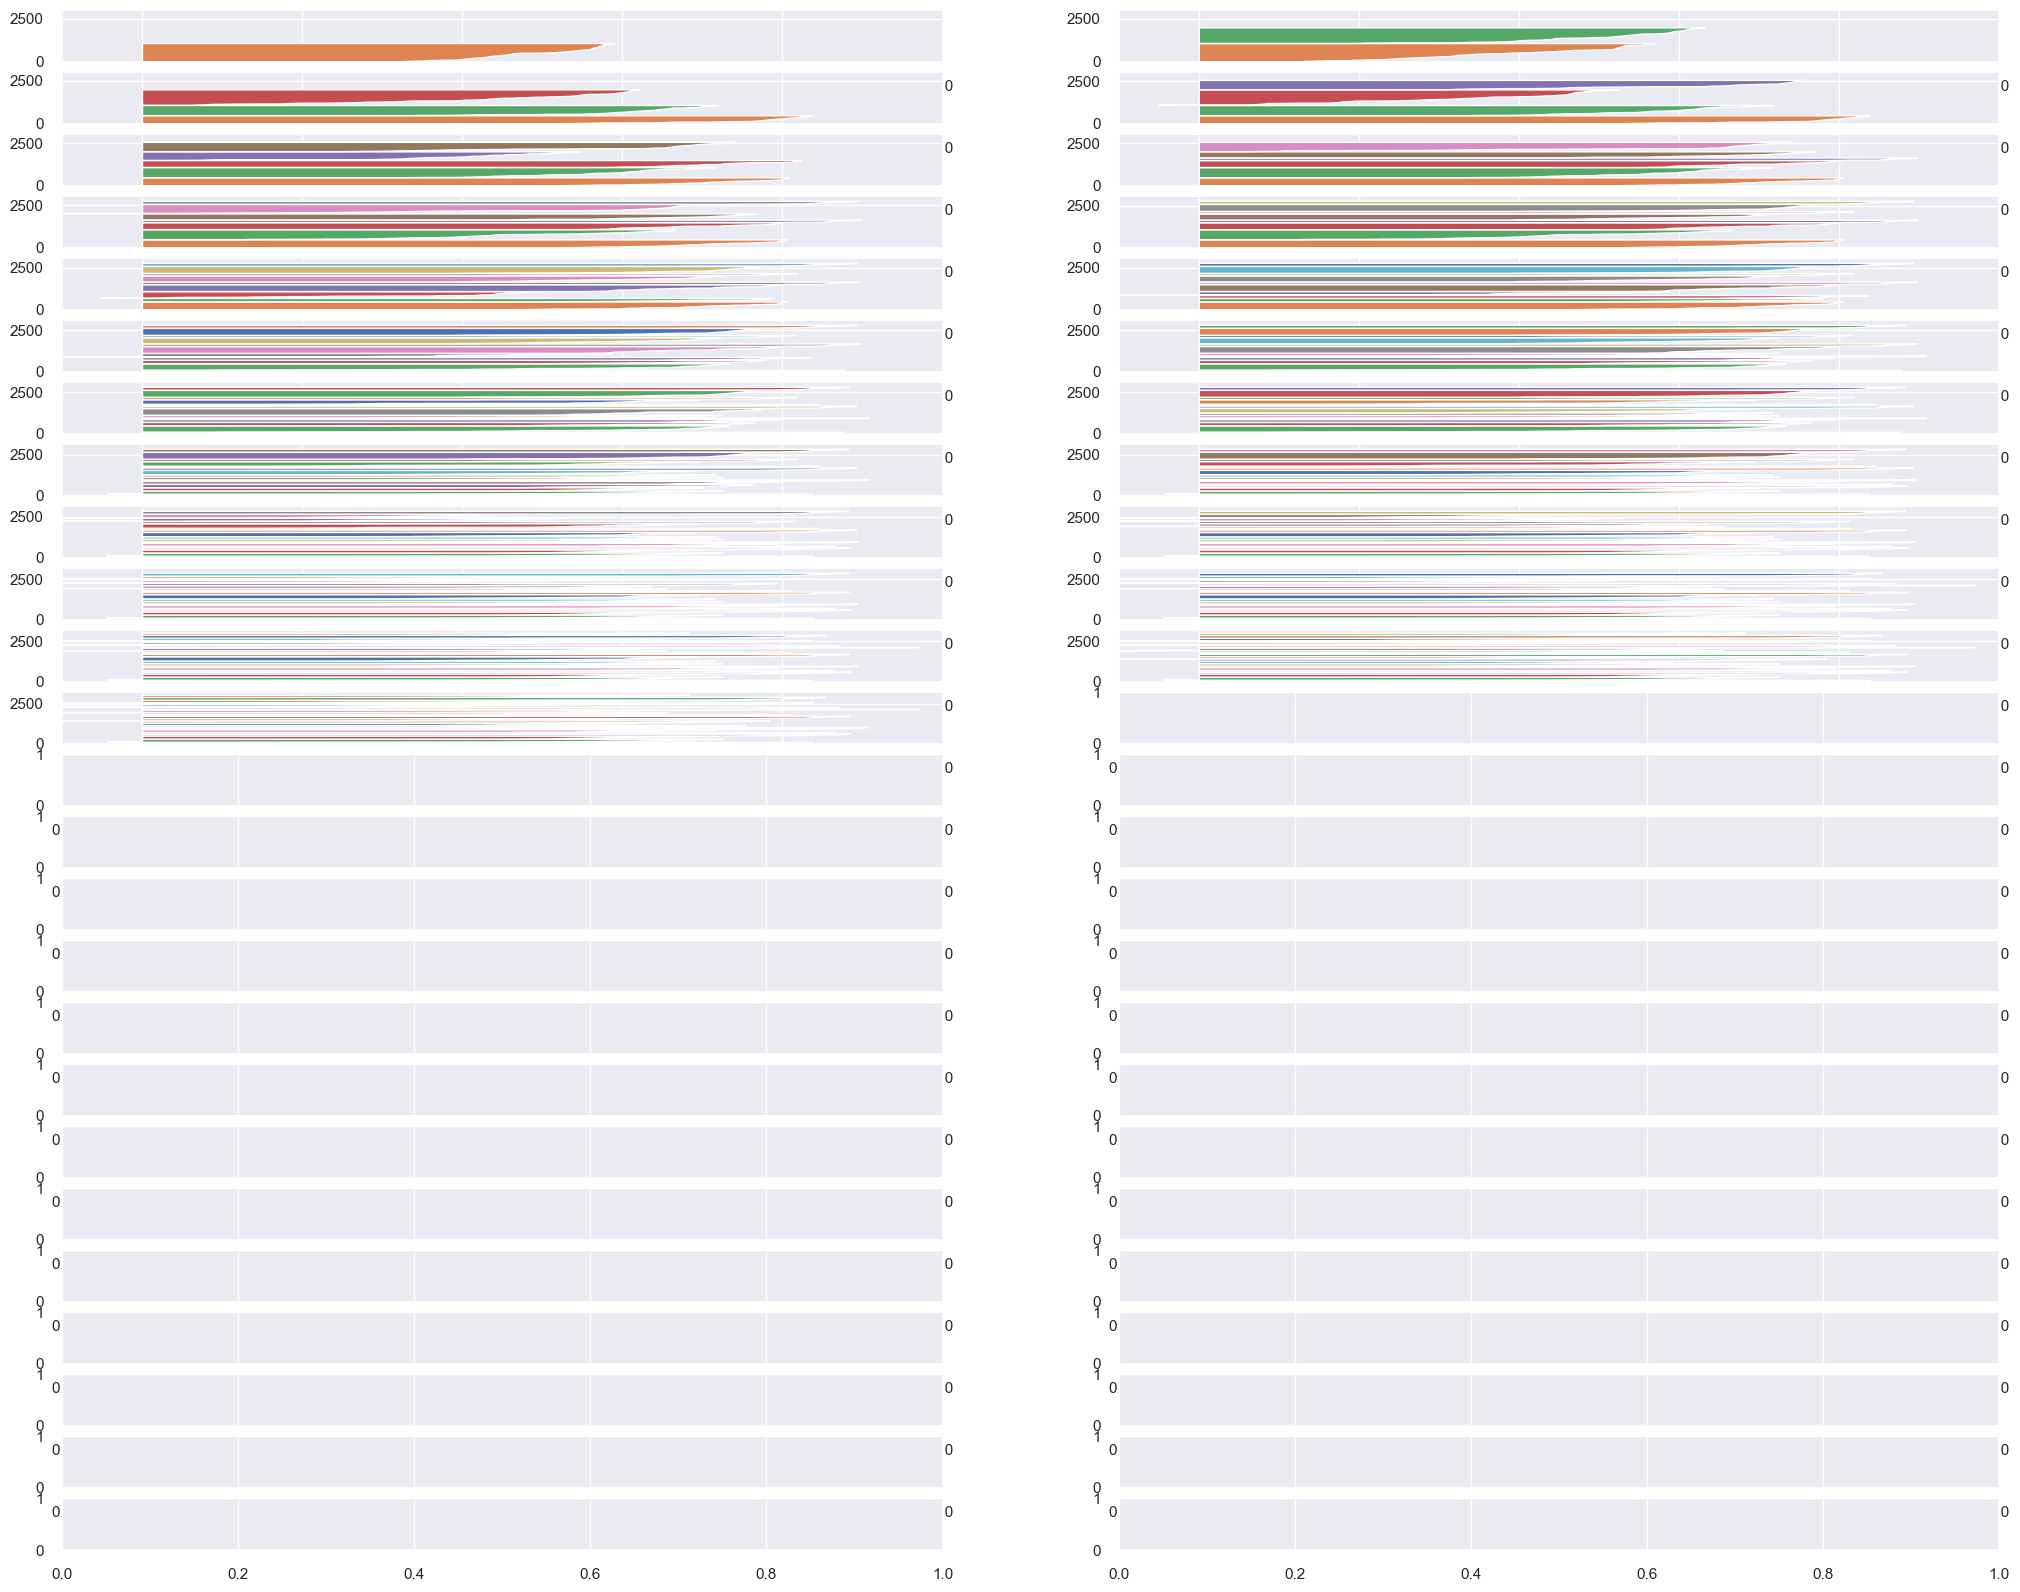

In [230]:
fig, ax = plt.subplots( 25, 2 )
fig.set_size_inches( 25, 20 )

for k in clusters:

    q, mod = divmod( k, 2 )

    ax[q-1, mod].set_xlim(  [ -0.1, 1] )
    ax[q-1, mod].set_ylim(  [ 0, len( X ) + ( k+1 )*10 ] )

    # model definition & training
    hc_model = hc.linkage( X, 'ward' )

    # model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # performance
    ss = m.silhouette_score( X, labels, metric='euclidean' )
    print( 'For K = {}. Silhouette Score: {}'.format( k, ss ) )
    
    samples_silhouette_values = m.silhouette_samples( X, labels )


    y_lower = 10
    for i in range( k ):

        #select clusters
        ith_samples_silhouette_values = samples_silhouette_values[ labels == i ]

        # sort values
        ith_samples_silhouette_values.sort()
        
        # size_clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap( 'Spectral' )
        color = cmap( i / k )

        ax[q-1, mod].fill_betweenx( np.arange( y_lower, y_upper ), 0, ith_samples_silhouette_values )

        y_lower = y_upper + 10

### 7.1. Hyperparameter Fine-Tunning

### 7.1. Within-Cluster Sum of Square ( WSS )

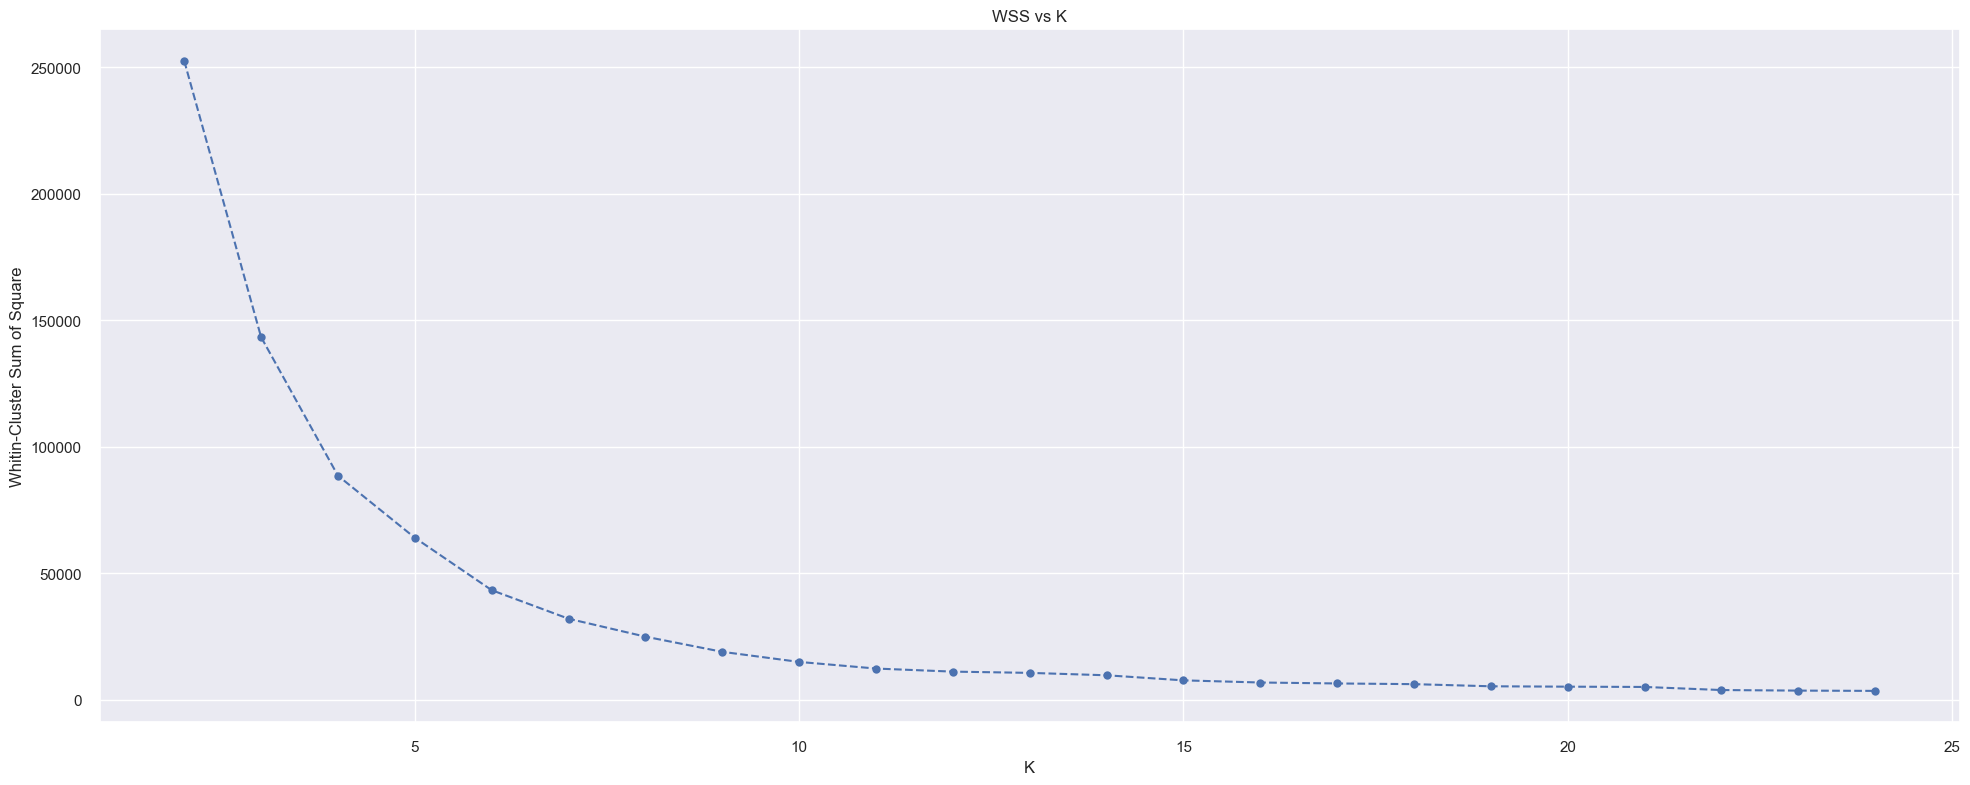

In [231]:
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

    # model training
    kmeans.fit( X )

    # validation
    wss.append( kmeans.inertia_ )

# plot wss - Elbow Method
plt.plot( clusters, wss, linestyle='--', marker='o', color='b' );
plt.xlabel( 'K' );
plt.ylabel( 'Whitin-Cluster Sum of Square' );
plt.title( 'WSS vs K');

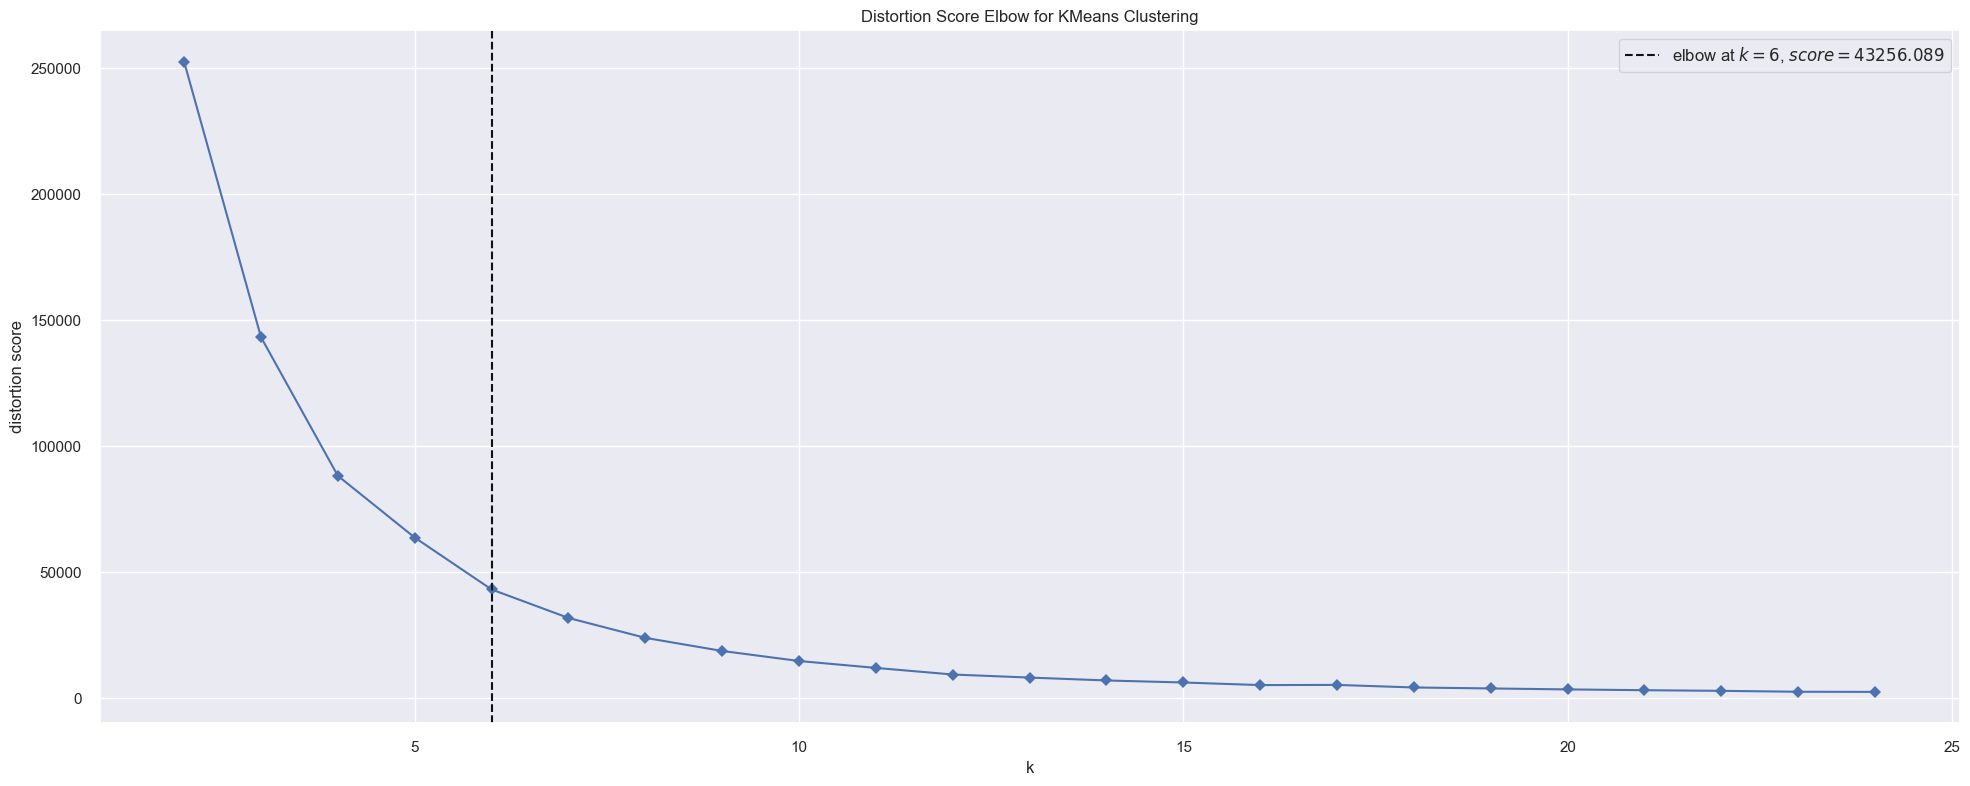

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [232]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False )
kmeans.fit( X )
kmeans.show()

### 7.2. Silhouette Score

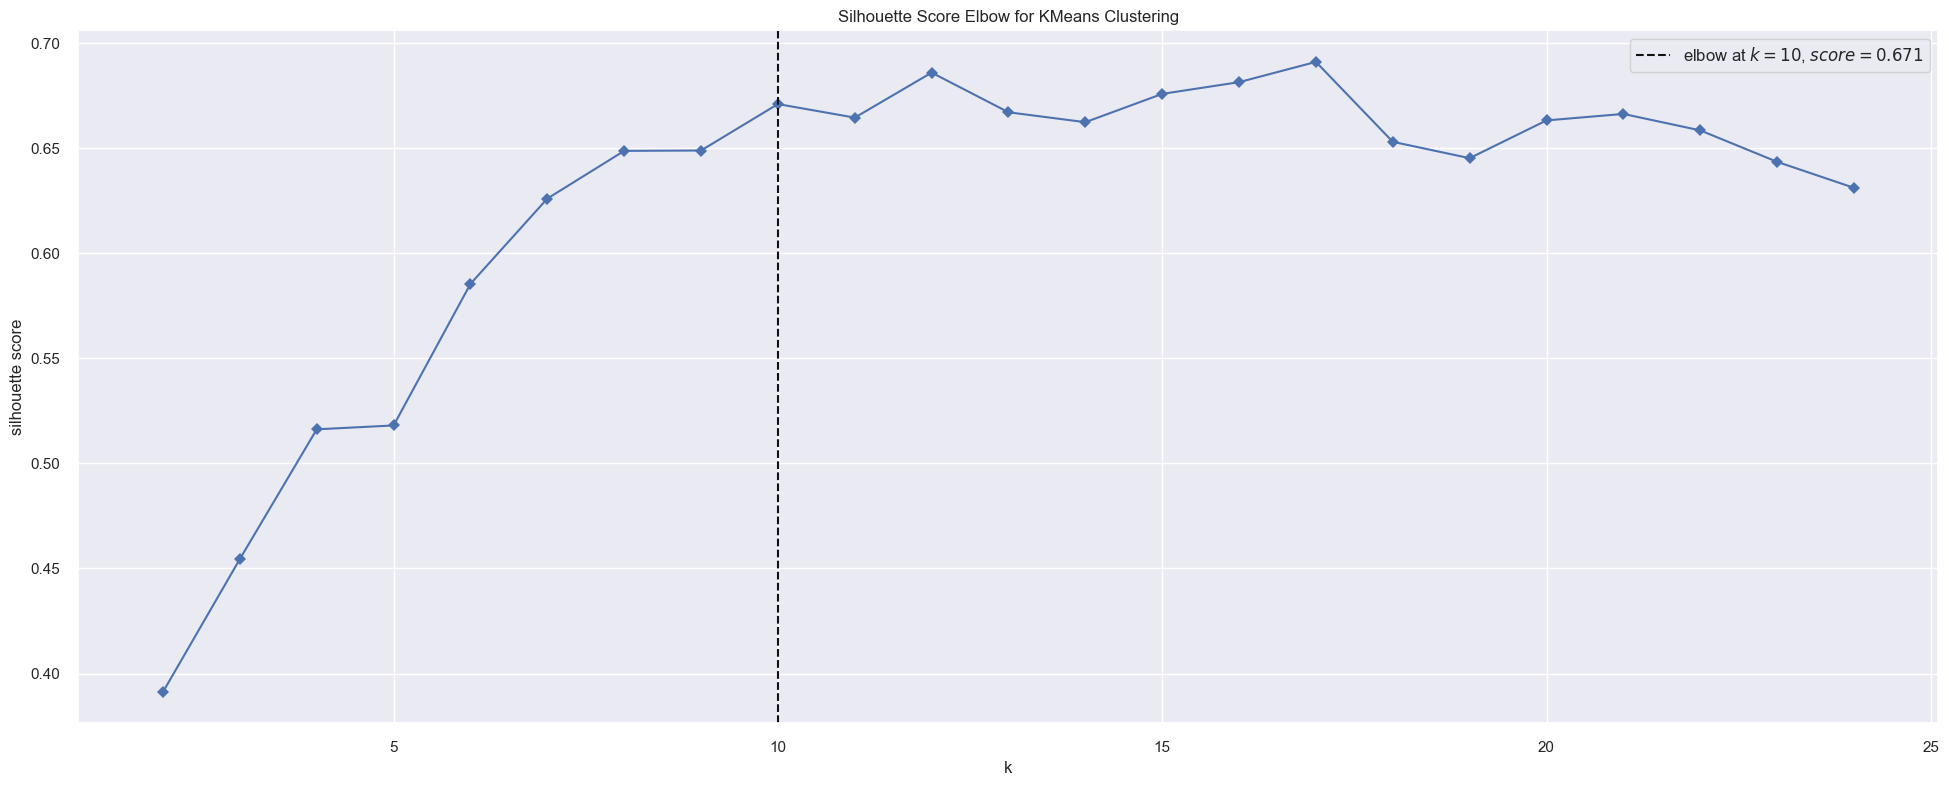

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [233]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette',  timings=False )
kmeans.fit( X )
kmeans.show()

### 7.3 Silhouette Analysis

In [234]:
X.head()

,embedding_x,embedding_y
0,-1.794532,-5.616612
1,-11.619191,3.220745
2,-1.727290,-6.593994
3,12.381402,8.551535
4,15.797197,0.220842


IndexError: index 3 is out of bounds for axis 0 with size 3

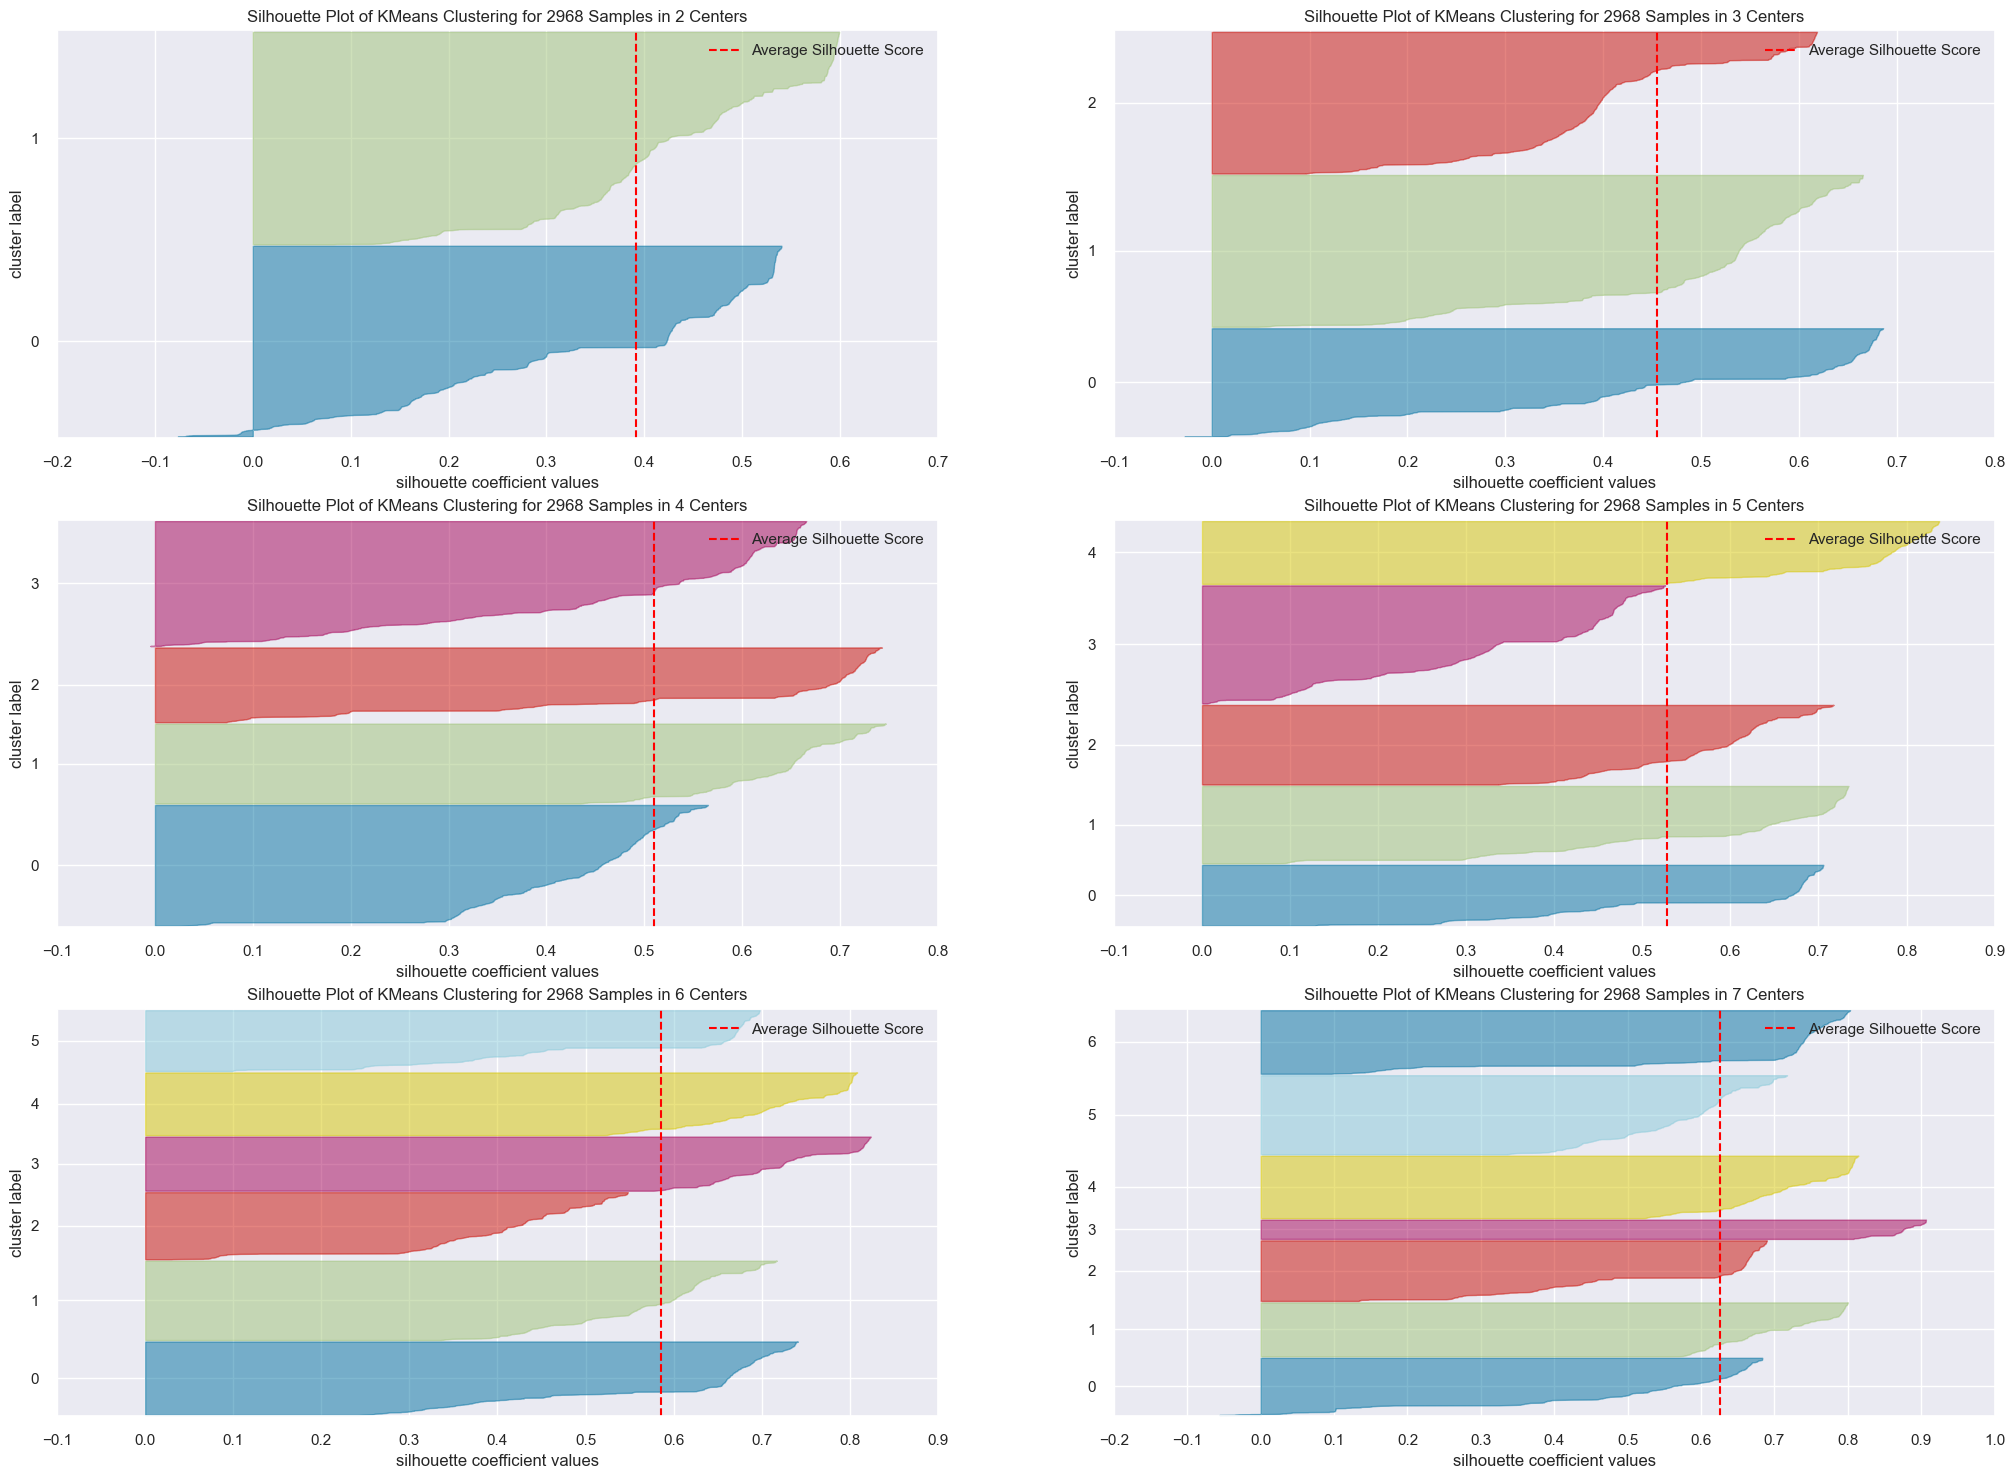

In [235]:
fig, ax = plt.subplots( 3, 2, figsize=(25, 18) )


for k in clusters:
    km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42 )
    q, mod = divmod( k, 2 )

    visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][ mod ] )
    visualizer.fit ( X )
    visualizer.finalize()

## <font color='red'> 8.0. Model Training </font>

### 8.1. K-Means

In [158]:
# # model definition
# k = 11
# kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

# # model training
# kmeans.fit( X )

# # clustering
# labels = kmeans.labels_

### 8.1. GMM

In [236]:
# model definition
k = 8
kmeans = mx.GaussianMixture( n_components=k )

# model training
kmeans.fit( X )

# model predict
labels = kmeans.predict( X )

### 8.2. Cluster Validation

In [ ]:
## WSS ( Within-Cluster Sum of Square )
print( 'WSS Value: {}'.format( kmeans.inertia_ ) )

## SS ( Silhouette Score )
print ( 'SS value: {}'.format( m.silhouette_score( X, labels, metric='euclidean' ) ) )

## <font color='red'> 9.0. Cluster Analysis </font>

In [241]:
df9 = X.copy()
df9['cluster'] = labels

In [242]:
df9.head()

,embedding_x,embedding_y,cluster
0,-1.794532,-5.616612,3
1,-11.619191,3.220745,5
2,-1.727290,-6.593994,3
3,12.381402,8.551535,4
4,15.797197,0.220842,0


In [240]:
df9 = df4.copy() #dados não escalados para não precisar voltar aos valores reais
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size,cluster
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.500000,17.000000,40.0,50.970588,0.617647,3
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,27.250000,0.028302,35.0,154.444444,11.666667,5
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,23.187500,0.040323,50.0,335.200000,7.600000,3
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000,4
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,8.600000,0.073171,22.0,26.666667,0.333333,0


### 9.1. Visualization Inspection

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

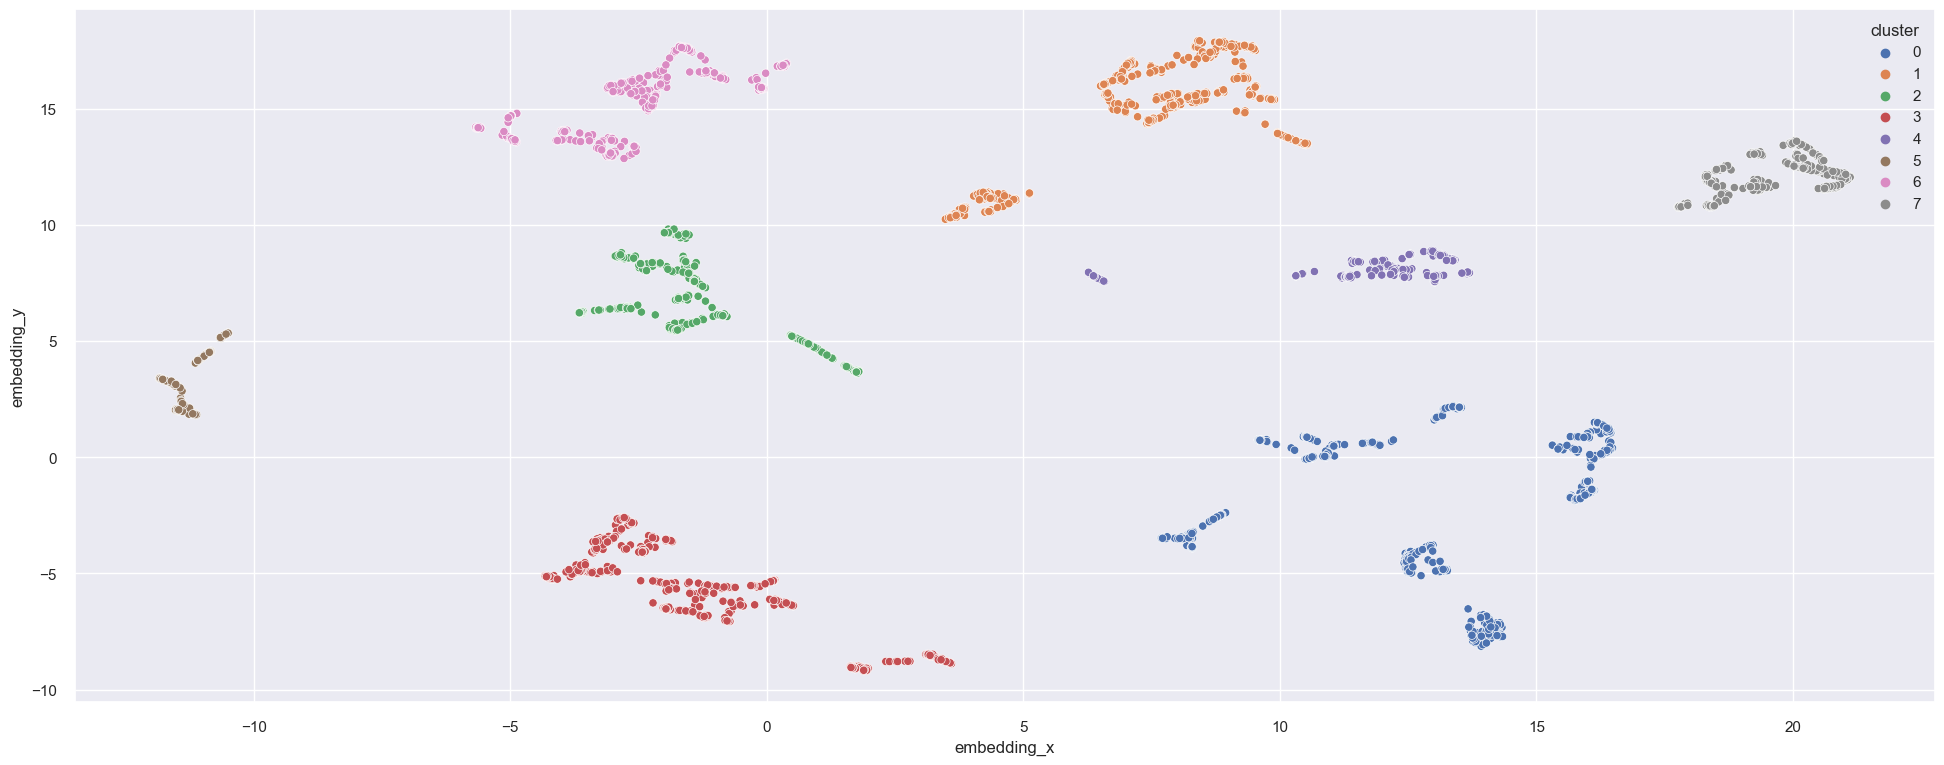

In [243]:
sns.scatterplot( x='embedding_x', y='embedding_y', hue='cluster', data=df9, palette='deep')

In [240]:
#fig = px.scatter_3d( df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster' )
#fig.show()

In [193]:
# visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick' )
# visualizer.fit( X )
# visualizer.finalize()

### 9.2. 2D Plot

In [331]:
df9.head(10)

,embedding_x,embedding_y,cluster
0,15.431046,8.948226,5
1,19.845535,6.011577,5
2,12.120426,19.646265,0
3,-6.918046,3.529696,7
4,3.173728,18.524078,9
5,18.113789,13.514511,0
6,13.709174,18.457832,0
7,18.199188,13.487879,0
8,-10.656537,7.518637,7
9,11.938202,-10.620165,6


In [ ]:
df_viz = df9.drop( columns='customer_id', axis=1 )
#sns.pairplot( df_viz, hue='cluster' )


### 9.3. UMAP

In [248]:
X.head()

,embedding_x,embedding_y
0,-1.794532,-5.616612
1,-11.619191,3.220745
2,-1.727290,-6.593994
3,12.381402,8.551535
4,15.797197,0.220842


In [ ]:
reducer = umap.UMAP( n_neighbors=90, random_state = 42 )
embedding = reducer.fit_transform( X ) # espaço projetado

# embeddind
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ), data=df_viz )


### 9.4. Cluster Profile

In [256]:
df92 = df4[ cols_selected ].copy()
df92['cluster'] = labels
df92.head()

,customer_id,gross_revenue,recency_days,qtde_products,frequency,qtde_returns,cluster
0,17850,5391.21,372.0,297.0,17.000000,40.0,3
1,13047,3232.59,56.0,171.0,0.028302,35.0,5
2,12583,6705.38,2.0,232.0,0.040323,50.0,3
3,13748,948.25,95.0,28.0,0.017921,0.0,4
4,15100,876.00,333.0,3.0,0.073171,22.0,0


In [257]:
df92.head()

,customer_id,gross_revenue,recency_days,qtde_products,frequency,qtde_returns,cluster
0,17850,5391.21,372.0,297.0,17.000000,40.0,3
1,13047,3232.59,56.0,171.0,0.028302,35.0,5
2,12583,6705.38,2.0,232.0,0.040323,50.0,3
3,13748,948.25,95.0,28.0,0.017921,0.0,4
4,15100,876.00,333.0,3.0,0.073171,22.0,0


In [258]:
# Number of Customer
df_cluster = df92[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_cluster'] = 100 * ( df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Average Gross Revenue
df_avg_gross_revenue = df92[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

# Average Recency Days
df_avg_recency_days = df92[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how='inner', on='cluster')

# Average Invoice_no
df_qtde_products = df92[['qtde_products', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_qtde_products, how='inner', on='cluster')

# Frequency
df_frequency = df92[['frequency', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_frequency, how='inner', on='cluster')

# Returns
df_qtde_returns = df92[['qtde_returns', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_qtde_returns, how='inner', on='cluster')

df_cluster

,cluster,customer_id,perc_cluster,gross_revenue,recency_days,qtde_products,frequency,qtde_returns
0,0,592,19.946092,553.689865,114.917230,14.160473,0.291256,6.538851
1,1,522,17.587601,1268.003142,62.189655,56.015326,0.047067,14.055556
2,2,356,11.994609,2404.790843,43.603933,128.362360,0.042313,19.904494
3,3,468,15.768194,8835.897073,21.438034,424.087607,0.094571,149.271368
4,4,202,6.805930,2998.171832,79.722772,54.900990,0.147206,28.391089
5,5,145,4.885445,3164.115448,34.427586,173.841379,0.060415,23.482759
6,6,404,13.611860,1689.073490,54.809406,89.175743,0.049992,11.542079
7,7,279,9.400270,954.046989,77.362007,36.530466,0.081823,5.709677


### Cluster 01: ( Candidato à Insider )
    - Número de customers: 6 ( 14% dos customers )
    - Recência em média: 7 dias
    - Compras em média: 89 compras
    - Receita em média: $182.182,00

### Cluster 02:
    - Número de customers: 31 ( 71% dos customers )
    - Recência em média: 14 dias
    - Compras em média: 53 compras
    - Receita em média: $40.543,52

### Cluster 03:
    - Número de customers: 4335 ( 99% dos customers )
    - Recência em média: 92 dias
    - Compras em média: 5 compras
    - Receita em média: $1.372,57

## <font color='red'> 10.0 Análise Exploratória de Dados </font>

### 10.1 MindMap de Hipóteses

1. Fenômeno
2. Entidades ( Customer, Location, Financy, Family )
3. Características da Entidade ( Customer=Nome, Idade, Salário, Escolaridade, ... )

### 10.2 Hipóteses de Negócios

1. Afirmação
2. Comparação entre variáveis
3. Valor base de comparação


### Hipóteses Compra:

1. Afirmação   |   Cluster  |   Tendo Base (Chute)

1. 80% dos clientes do cluster insiders usam cartão de crédito como forma de pagamento.

### Hipóteses Produto:

### Hipóteses Cliente:

### 10.3 Priorização das Hipóteses

### 10.4 Validação das Hipóteses

## <font color='red'> 11.0 Deploy To Production </font>

In [202]:
# plano
# TMUX



